# Project: Data Mining
# Data Mining for Improved Healthcare

**Submission by:**

Anjana Ranjan (n11119985)


Kavya Kore (n10840371)


Rohit Dasgupta (n11130130)

## Project (a): Association mining to find hotspots based on a Patient Route Data

In [1]:
#import libraries
import pandas as pd

In [2]:
#import data
data = "D1.csv"
df = pd.read_csv(data)
df.head()

,patient_id,global_num,date,location,latitude,longitude
0,P1000000501,2.0,22/04/2020,Chittorgarh_Rajasthan,24.879999,74.629997
1,P1000000501,2.0,24/04/2020,Ratnagiri_Maharashtra,16.994444,73.300003
2,P1000000502,5.0,26/04/2020,Pindwara_Rajasthan,24.794500,73.055000
3,P1000000502,5.0,27/04/2020,Raipur_Chhattisgarh,21.250000,81.629997
4,P1000000502,5.0,28/04/2020,Gokak_Karnataka,16.166700,74.833298


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1544 entries, 0 to 1543
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   patient_id  1544 non-null   object 
 1   global_num  975 non-null    float64
 2   date        1544 non-null   object 
 3   location    1544 non-null   object 
 4   latitude    1544 non-null   float64
 5   longitude   1544 non-null   float64
dtypes: float64(3), object(3)
memory usage: 72.5+ KB


In [4]:
df[df['global_num'].isna()]

,patient_id,global_num,date,location,latitude,longitude
751,P1100000501,NaN,20/05/2020,Chirala_Andhra Pradesh,15.812074,80.355377
752,P1100000501,NaN,20/05/2020,Markapur_Andhra Pradesh,15.764501,79.259491
753,P1100000501,NaN,21/05/2020,Chalakudy_Kerala,10.311879,76.331978
754,P1100000502,NaN,18/05/2020,Gokak_Karnataka,16.166700,74.833298
755,P1100000502,NaN,18/05/2020,Gondal_Gujarat,21.961946,70.792297
...,...,...,...,...,...,...
1538,P9011000510,NaN,19/05/2020,Guntakal_Andhra Pradesh,15.167409,77.373627
1539,P9011000510,NaN,19/05/2020,Sagar_Karnataka,14.167040,75.040298
1540,P9011000510,NaN,19/05/2020,Jorapokhar_Jharkhand,22.422455,85.760651
1541,P9014000503,NaN,27/05/2020,Rewa_Madhya Pradesh,24.530727,81.299110


The row with missing values not required for data processing.

#### Data Pre-processing 

Data is not in transactional/list format that is required for association mining. Let us group the locations travelled by each patient 


In [5]:
travel_history = df.groupby(['patient_id'])['location'].apply(list)
travel_history

patient_id
P1000000501       [Chittorgarh_Rajasthan, Ratnagiri_Maharashtra]
P1000000502    [Pindwara_Rajasthan, Raipur_Chhattisgarh, Goka...
P1000000504                              [Lucknow_Uttar Pradesh]
P1000000505                              [Lucknow_Uttar Pradesh]
P1000000506                                        [Delhi_Delhi]
                                     ...                        
P9100000582                                      [Anand_Gujarat]
P9100000583    [Channapatna_Karnataka, Sivasagar_Assam, Jorap...
P9100000585                               [Ranaghat_West Bengal]
P9100000586                  [RL Infotechh & Solutions_Durgapur]
P9100000590             [Sardarshahar_Rajasthan, Pali_Rajasthan]
Name: location, Length: 911, dtype: object

In [6]:
type(travel_history)

pandas.core.series.Series

In [7]:
th = pd.DataFrame(travel_history)
pd.set_option("display.max_rows", None, "display.max_columns", None)

#### Association mining model

In [8]:
from apyori import apriori
# type cast the transactions from pandas into normal list format and run apriori
th_list = list(travel_history)
results = list(apriori(th_list, min_support=0.003, min_confidence = 0.03))
# print first 5 rules
print(results[:5])


[RelationRecord(items=frozenset({'Chalakudy_Kerala'}), support=0.05598243688254665, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'Chalakudy_Kerala'}), confidence=0.05598243688254665, lift=1.0)]), RelationRecord(items=frozenset({'Channapatna_Karnataka'}), support=0.05598243688254665, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'Channapatna_Karnataka'}), confidence=0.05598243688254665, lift=1.0)]), RelationRecord(items=frozenset({'Gokak_Karnataka'}), support=0.054884742041712405, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'Gokak_Karnataka'}), confidence=0.054884742041712405, lift=1.0)]), RelationRecord(items=frozenset({'Jorapokhar_Jharkhand'}), support=0.03951701427003293, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'Jorapokhar_Jharkhand'}), confidence=0.03951701427003293, lift=1.0)]), RelationRecord(items=frozenset({'Kollam_Kerala'}), su

In [9]:
def convert_apriori_results_to_pandas_df(results):
    rules = []
    for rule_set in results:
        for rule in rule_set.ordered_statistics:
            rules.append([','.join(rule.items_base), ','.join(rule.items_add),
            rule_set.support, rule.confidence, rule.lift])

         # typecast it to pandas df
    return pd.DataFrame(rules, columns=['Left_side', 'Right_side', 'Support','Confidence', 'Lift'])
result_df = convert_apriori_results_to_pandas_df(results)
result_df.head()


,Left_side,Right_side,Support,Confidence,Lift
0,,Chalakudy_Kerala,0.055982,0.055982,1.0
1,,Channapatna_Karnataka,0.055982,0.055982,1.0
2,,Gokak_Karnataka,0.054885,0.054885,1.0
3,,Jorapokhar_Jharkhand,0.039517,0.039517,1.0
4,,Kollam_Kerala,0.059276,0.059276,1.0


In [10]:
result_df.shape

(157, 5)

In [11]:
result_df = result_df.sort_values(by='Lift', ascending=False)
result_df.head()

,Left_side,Right_side,Support,Confidence,Lift
154,"Panaji_Goa,Raiganj_West Bengal",Shivpuri_Madhya Pradesh,0.004391,1.000000,70.076923
153,Shivpuri_Madhya Pradesh,"Panaji_Goa,Raiganj_West Bengal",0.004391,0.307692,70.076923
109,Pali_Rajasthan,Palwal_Haryana,0.003293,0.375000,68.325000
110,Palwal_Haryana,Pali_Rajasthan,0.003293,0.600000,68.325000
151,Panaji_Goa,"Raiganj_West Bengal,Shivpuri_Madhya Pradesh",0.004391,0.500000,56.937500


#### Chalakudy travellers 

In [12]:
result_ch_df = result_df.loc[(result_df['Left_side'] == 'Chalakudy_Kerala')]
result_ch_df

,Left_side,Right_side,Support,Confidence,Lift
37,Chalakudy_Kerala,Proddatur_Andhra Pradesh,0.003293,0.058824,17.862745
27,Chalakudy_Kerala,Gondal_Gujarat,0.007684,0.137255,12.503922
35,Chalakudy_Kerala,Palwal_Haryana,0.003293,0.058824,10.717647
23,Chalakudy_Kerala,Chirala_Andhra Pradesh,0.004391,0.078431,10.207283
22,Chalakudy_Kerala,Bhimavaram_Andhra Pradesh,0.006586,0.117647,9.743316
25,Chalakudy_Kerala,Domchanch_Jharkhand,0.003293,0.058824,8.931373
33,Chalakudy_Kerala,Pali_Rajasthan,0.003293,0.058824,6.698529
41,Chalakudy_Kerala,Sinnar_Maharashtra,0.005488,0.098039,5.253749
31,Chalakudy_Kerala,Markapur_Andhra Pradesh,0.004391,0.078431,5.103641
29,Chalakudy_Kerala,Manikchak_West Bengal,0.003293,0.058824,1.728653


#### Sequence mining

Sequence mining can be performed on this dataset as a date column is present which denotes date in which the postive patients had been in which location. Hence, the sequence can be generated with the help of date.

In [13]:
#check the datatype of the date column
print(df.dtypes)

patient_id     object
global_num    float64
date           object
location       object
latitude      float64
longitude     float64
dtype: object


In [14]:
#convert date to type datetime
df['date']= pd.to_datetime(df['date'])

df.dtypes

patient_id            object
global_num           float64
date          datetime64[ns]
location              object
latitude             float64
longitude            float64
dtype: object

In [15]:
#check if dates are in order
# df[["paient_id", "date"]]
df[['patient_id', 'date']].head()

,patient_id,date
0,P1000000501,2020-04-22
1,P1000000501,2020-04-24
2,P1000000502,2020-04-26
3,P1000000502,2020-04-27
4,P1000000502,2020-04-28


In [16]:
th_seq = df.groupby(['patient_id'])['location'].apply(list)
sequences = th_seq.values.tolist()

# show the first 5 sequences
# print(th_seq)
print(sequences[:5])

[['Chittorgarh_Rajasthan', 'Ratnagiri_Maharashtra'], ['Pindwara_Rajasthan', 'Raipur_Chhattisgarh', 'Gokak_Karnataka'], ['Lucknow_Uttar Pradesh'], ['Lucknow_Uttar Pradesh'], ['Delhi_Delhi']]


In [17]:
from collections import defaultdict
import subprocess
import re

''' Uses SPMF to find association rules in supplied transactions '''
def get_association_rules(sequences, min_sup, min_conf):
    # step 1: create required input for SPMF
    
    # prepare a dict to uniquely assign each item in the transactions to an int ID
    item_dict = defaultdict(int)
    output_dict = defaultdict(str)
    item_id = 1
    
    # write your sequences in SPMF format
    with open('seq_rule_input.txt', 'w+') as f:
        for sequence in sequences:
            z = []
            for itemset in sequence:
                # if there are multiple items in one itemset
                if isinstance(itemset, list):
                    for item in itemset:
                        if item not in item_dict:
                            item_dict[item] = item_id
                            item_id += 1

                        z.append(item_dict[item])
                else:
                    if itemset not in item_dict:
                        item_dict[itemset] = item_id
                        output_dict[str(item_id)] = itemset
                        item_id += 1
                    z.append(item_dict[itemset])
                    
                # end of itemset
                z.append(-1)
            
            # end of a sequence
            z.append(-2)
            f.write(' '.join([str(x) for x in z]))
            f.write('\n')
    
    # run SPMF with supplied parameters
    supp_param = '{}%'.format(int(min_sup * 100))
    conf_param = '{}%'.format(int(min_conf * 100))
    subprocess.call(['java', '-jar', 'spmf.jar', 'run', 'RuleGrowth', 
                     'seq_rule_input.txt', 'seq_rule_output.txt', 
                     supp_param, conf_param], shell=True)
    
    # read back the output rules
    outputs = open('seq_rule_output.txt', 'r').read().strip().split('\n')
    output_rules = []
    for rule in outputs:
        left, right, sup, conf = re.search(pattern=r'([0-9\,]+) ==> ([0-9\,]+) #SUP: ([0-9]+) #CONF: ([0-9\.]+)', string=rule).groups()
        sup = int(sup) / len(sequences)
        conf = float(conf)
        output_rules.append([[output_dict[x] for x in left.split(',')], [output_dict[x] for x in right.split(',')], sup, conf])
    
    # return pandas DataFrame
    return pd.DataFrame(output_rules, columns = ['Left_rule', 'Right_rule', 'Support', 'Confidence'])

In [18]:
sq_df = get_association_rules(sequences, 0.003, 0.3)

In [19]:
sq_df['Lift'] = sq_df['Confidence']/sq_df['Support']


In [20]:
sq_df = sq_df.sort_values(by='Lift', ascending=False)
sq_df.head()

,Left_rule,Right_rule,Support,Confidence,Lift
257,"[Sagar_Karnataka, Haringhata_West Bengal]",[Sirohi_Rajasthan],0.001098,1.0,911.0
343,[Port Blair_Andaman and Nicobar Islands],[Sirohi_Rajasthan],0.001098,1.0,911.0
597,"[Roorkee_Uttarakhand, Chalakudy_Kerala, Ranagh...",[Vasco da Gama_Goa],0.001098,1.0,911.0
598,"[Roorkee_Uttarakhand, Chalakudy_Kerala]","[Vasco da Gama_Goa, Ranaghat_West Bengal]",0.001098,1.0,911.0
599,"[Roorkee_Uttarakhand, Chalakudy_Kerala]",[Ranaghat_West Bengal],0.001098,1.0,911.0


## Project (b): Clustering COVID-19 Epudemiological data

In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import numpy as np

In [22]:
df1 = pd.read_csv("D2_mar.csv")
df2 = pd.read_csv("D2_apr.csv")

In [23]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102 entries, 0 to 101
Data columns (total 9 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   residual_transmission               102 non-null    float64
 1   regulatable_transmission            102 non-null    float64
 2   recovery_rate                       102 non-null    float64
 3   detection_rate                      102 non-null    float64
 4   death_rate                          102 non-null    float64
 5   response_slope                      102 non-null    float64
 6   initial_relative_latent_infections  102 non-null    float64
 7   response_weights                    102 non-null    float64
 8   Country                             102 non-null    object 
dtypes: float64(8), object(1)
memory usage: 7.3+ KB


In [24]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118 entries, 0 to 117
Data columns (total 9 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   residual_transmission               118 non-null    float64
 1   regulatable_transmission            118 non-null    float64
 2   recovery_rate                       118 non-null    float64
 3   detection_rate                      118 non-null    float64
 4   death_rate                          118 non-null    float64
 5   response_slope                      118 non-null    float64
 6   initial_relative_latent_infections  118 non-null    float64
 7   response_weights                    118 non-null    float64
 8   Country                             118 non-null    object 
dtypes: float64(8), object(1)
memory usage: 8.4+ KB


# Objective
The objective of our analysis is to understand how various countries were affected during the covid outbreak in the months of March & April.

# 1.Preprocessing
The following columns can be removed as they are irrelevant to our analyses:
* response_slope
* initial_relative_latent_infections
* response_weights

In [25]:
df2 = df2.drop(['response_slope','initial_relative_latent_infections','response_weights'], axis = 1)
df1 = df1.drop(['response_slope','initial_relative_latent_infections','response_weights'], axis = 1)

We find out if there are more than one mentions of a country.

In [26]:
df2[df2['Country'].duplicated() == True]

,residual_transmission,regulatable_transmission,recovery_rate,detection_rate,death_rate,Country


As proven above, there's only one occurence of each country

In [27]:
print(df1.shape)
print(df2.shape)

(102, 6)
(118, 6)


* March data has 102 rows/countries.
* April data has 118 rows/countries.

In [28]:
df1['residual_transmission'].value_counts(bins = 6)

(-0.002, 0.167]    55
(0.167, 0.333]     38
(0.5, 0.667]        5
(0.667, 0.833]      2
(0.333, 0.5]        1
(0.833, 1.0]        1
Name: residual_transmission, dtype: int64

In [29]:
df2['residual_transmission'].value_counts(bins = 6)

(0.167, 0.333]     59
(-0.002, 0.167]    28
(0.333, 0.5]       26
(0.833, 1.0]        3
(0.5, 0.667]        2
(0.667, 0.833]      0
Name: residual_transmission, dtype: int64

In [30]:
df1['regulatable_transmission'].value_counts(bins = 6)

(-0.002, 0.167]    59
(0.167, 0.333]     32
(0.333, 0.5]        8
(0.5, 0.667]        1
(0.667, 0.833]      1
(0.833, 1.0]        1
Name: regulatable_transmission, dtype: int64

In [31]:
df2['regulatable_transmission'].value_counts(bins = 6)

(0.167, 0.333]     66
(-0.002, 0.167]    42
(0.333, 0.5]        6
(0.5, 0.667]        3
(0.833, 1.0]        1
(0.667, 0.833]      0
Name: regulatable_transmission, dtype: int64

In [32]:
df1['recovery_rate'].value_counts(bins = 6)

(-0.002, 0.167]    71
(0.167, 0.333]     19
(0.333, 0.5]        7
(0.5, 0.667]        3
(0.667, 0.833]      1
(0.833, 1.0]        1
Name: recovery_rate, dtype: int64

In [33]:
df2['recovery_rate'].value_counts(bins = 11)

(-0.002, 0.0909]    37
(0.0909, 0.182]     31
(0.273, 0.364]      15
(0.182, 0.273]      10
(0.364, 0.455]       7
(0.455, 0.545]       6
(0.636, 0.727]       4
(0.727, 0.818]       3
(0.545, 0.636]       2
(0.909, 1.0]         2
(0.818, 0.909]       1
Name: recovery_rate, dtype: int64

In [34]:
df1['detection_rate'].value_counts(bins = 6)

(0.167, 0.333]     66
(-0.002, 0.167]    20
(0.333, 0.5]        9
(0.5, 0.667]        6
(0.833, 1.0]        1
(0.667, 0.833]      0
Name: detection_rate, dtype: int64

In [35]:
df2['detection_rate'].value_counts(bins = 9)

(0.333, 0.444]     35
(0.222, 0.333]     34
(0.111, 0.222]     20
(0.556, 0.667]      9
(0.444, 0.556]      8
(0.667, 0.778]      4
(0.778, 0.889]      4
(-0.002, 0.111]     2
(0.889, 1.0]        2
Name: detection_rate, dtype: int64

In [36]:
df1['death_rate'].value_counts(bins = 6)

(-0.002, 0.167]    62
(0.167, 0.333]     33
(0.333, 0.5]        5
(0.5, 0.667]        1
(0.833, 1.0]        1
(0.667, 0.833]      0
Name: death_rate, dtype: int64

In [37]:
print(df2['death_rate'].value_counts(bins = 6),'\n', df1['death_rate'].value_counts(bins = 6))

(-0.002, 0.167]    56
(0.167, 0.333]     39
(0.333, 0.5]       17
(0.5, 0.667]        3
(0.667, 0.833]      2
(0.833, 1.0]        1
Name: death_rate, dtype: int64 
 (-0.002, 0.167]    62
(0.167, 0.333]     33
(0.333, 0.5]        5
(0.5, 0.667]        1
(0.833, 1.0]        1
(0.667, 0.833]      0
Name: death_rate, dtype: int64


In [38]:
df1['Country'].head(10)

0    ARM
1    HND
2    HRV
3    HUN
4    IDN
5    IND
6    IRL
7    IRN
8    IRQ
9    ISL
Name: Country, dtype: object

In [39]:
df2['Country'].head(10)

0    ARM
1    HND
2    HRV
3    HUN
4    IDN
5    IND
6    IRL
7    IRN
8    IRQ
9    ISL
Name: Country, dtype: object

# 2. (March & April)
* a)  K-Means clustering algorithm has been used for both March and April datasets.
* b) The attributes used here are 'residual_transmission', 'regulatable_transmission', 'recovery_rate', 'detection_rate' and 'death_rate'

In [40]:
from sklearn.preprocessing import StandardScaler

# take 3 variables and drop the rest
df1c = df1[['residual_transmission', 'regulatable_transmission', 'recovery_rate', 'detection_rate', 'death_rate']]
df2c = df2[['residual_transmission', 'regulatable_transmission', 'recovery_rate', 'detection_rate', 'death_rate']]
# convert df2 to matrix
X = df1c.to_numpy()
Y = df2c.to_numpy()
# scaling
scaler1 = StandardScaler()
X = scaler1.fit_transform(X)
scaler2 = StandardScaler()
Y = scaler2.fit_transform(Y)

Finding the centroid locations of March data


In [41]:
from sklearn.cluster import KMeans

# random state, we will use 42 instead of 10 for a change
rs = 42

# set the random state. different random state seeds might result in different centroids locations
model = KMeans(n_clusters=3, random_state=rs)
model.fit(X)

# sum of intra-cluster distances
print("Sum of intra-cluster distance:", model.inertia_)

print("Centroid locations:")
for centroid in model.cluster_centers_:
    print(centroid)

Sum of intra-cluster distance: 269.72643085735376
Centroid locations:
[ 2.84296209  1.97952173  0.64525345 -1.39443246  1.73840057]
[-0.29198325 -0.30727761 -0.29383594 -0.17726683 -0.19048645]
[-0.1997607   0.32572956  0.97201472  1.53071595 -0.06874323]


In [42]:
# set a different n_clusters
model = KMeans(n_clusters=8, random_state=rs)
model.fit(X)

# sum of intra-cluster distances
print("Sum of intra-cluster distance:", model.inertia_)

print("Centroid locations:")
for centroid in model.cluster_centers_:
    print(centroid)

Sum of intra-cluster distance: 114.63148677290172
Centroid locations:
[-0.12446253  0.16808096 -0.29905048  2.03628257 -0.86718094]
[ 2.9223892   2.11504804 -0.22548299 -1.49201444  0.90942492]
[-0.21433777 -0.47806166  0.22016037 -0.13175903  0.63482571]
[-0.23207664 -0.15441508  2.03442011  0.59390915 -0.06520867]
[-0.76537532  5.75471173  1.66457759  5.33846912 -1.16546669]
[ 2.25265817  1.88459495 -0.20848797 -0.88603046  6.63652419]
[ 2.89983274  1.62040619  3.68433347 -1.35588751  1.77626568]
[-0.31810285 -0.21494398 -0.51805521 -0.12195415 -0.464642  ]


# 3. Visualization: (March)
* a. Visualizing clusters using pairplot

Cluster membership
1    76
2    17
0     9
Name: Cluster_ID, dtype: int64


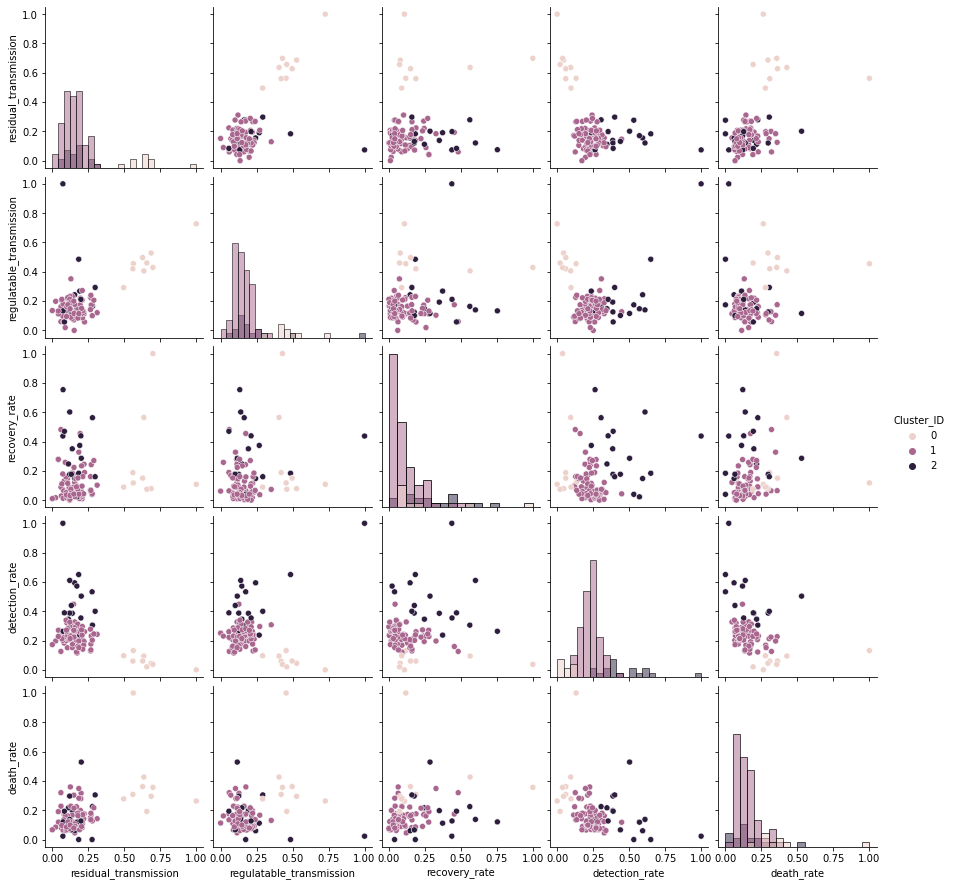

In [43]:
model = KMeans(n_clusters=3, random_state=rs).fit(X)

# assign cluster ID to each record in X
# Ignore the warning, does not apply to our case here
y = model.predict(X)
df1c['Cluster_ID'] = y

# how many records are in each cluster
print("Cluster membership")
print(df1c['Cluster_ID'].value_counts())

# pairplot the cluster distribution.
cluster_g = sns.pairplot(df1c, hue='Cluster_ID',diag_kind='hist')
plt.show()

In [44]:
# set a different n_clusters
model = KMeans(n_clusters=8, random_state=rs)
model.fit(X)

# sum of intra-cluster distances
print("Sum of intra-cluster distance:", model.inertia_)

print("Centroid locations:")
for centroid in model.cluster_centers_:
    print(centroid)

Sum of intra-cluster distance: 114.63148677290172
Centroid locations:
[-0.12446253  0.16808096 -0.29905048  2.03628257 -0.86718094]
[ 2.9223892   2.11504804 -0.22548299 -1.49201444  0.90942492]
[-0.21433777 -0.47806166  0.22016037 -0.13175903  0.63482571]
[-0.23207664 -0.15441508  2.03442011  0.59390915 -0.06520867]
[-0.76537532  5.75471173  1.66457759  5.33846912 -1.16546669]
[ 2.25265817  1.88459495 -0.20848797 -0.88603046  6.63652419]
[ 2.89983274  1.62040619  3.68433347 -1.35588751  1.77626568]
[-0.31810285 -0.21494398 -0.51805521 -0.12195415 -0.464642  ]


Cluster membership
7    53
2    25
3     8
0     6
1     6
6     2
5     1
4     1
Name: Cluster_ID, dtype: int64


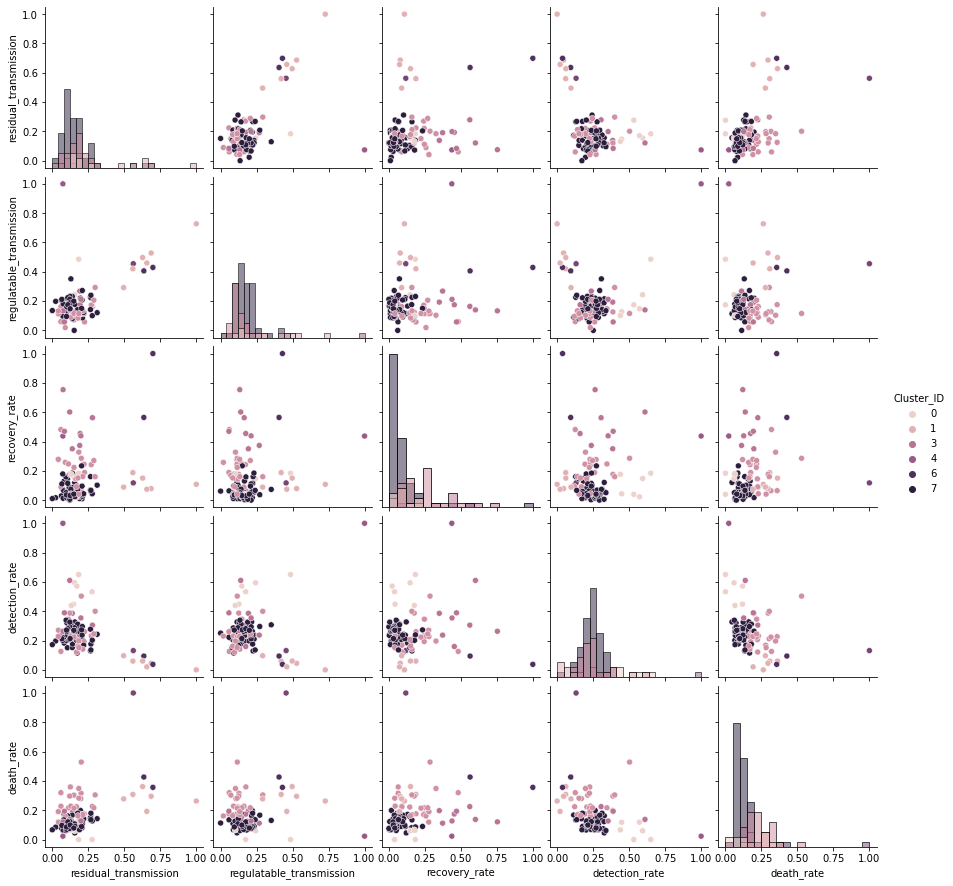

In [45]:
# again, ignore the warning
y = model.predict(X)
df1c['Cluster_ID'] = y

# how many in each
print("Cluster membership")
print(df1c['Cluster_ID'].value_counts())

# pairplot
cluster_g = sns.pairplot(df1c, hue='Cluster_ID',diag_kind='hist')
plt.show()

In [46]:
# list to save the clusters and cost
clusters = []
inertia_vals = []

# this whole process should take a while
for k in range(2, 15, 2):
    # train clustering with the specified K
    model = KMeans(n_clusters=k, random_state=rs, n_jobs=10)
    model.fit(X)
    
    # append model to cluster list
    clusters.append(model)
    inertia_vals.append(model.inertia_)

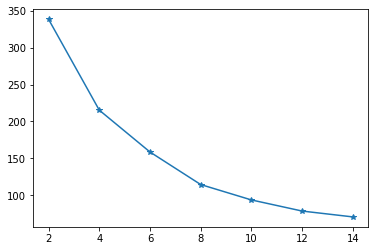

In [47]:
# plot the inertia vs K values
plt.plot(range(2,15,2), inertia_vals, marker='*')
plt.show()


*  Here, using the the elbow is somewhere between 6 and 8. Either values can be selected as the optimal 𝐾. But this is not enough. Below we have also use the Silhouette score to be more accurate. We used silhouette_score from sklearn to determine the following:

In [48]:
from sklearn.metrics import silhouette_score
print(clusters[2])
print("Silhouette score for k=6", silhouette_score(X, clusters[2].predict(X)))
print(clusters[3])
print("Silhouette score for k=8", silhouette_score(X, clusters[3].predict(X)))


KMeans(n_clusters=6, n_jobs=10, random_state=42)
Silhouette score for k=6 0.34018257508540317
KMeans(n_jobs=10, random_state=42)
Silhouette score for k=8 0.29951525843213644


A mean silhouette score of 0.34 for $K=6$ and 0.29 for $K=8$ has been shown. This shows clusters in $K=6$ are more appropriately matched to its own cluster then $K=8$. Therefore, we could choose $K=6$ over $K=8$ on the basis of this score.

# Final Visualization: (March)
* 3a. Visualizing clusters using pairplot

Sum of intra-cluster distance: 158.68980431785306
Centroid locations:
[ 2.25265817  1.88459495 -0.20848797 -0.88603046  6.63652419]
[-0.30264437 -0.25814297 -0.49071286 -0.18067485 -0.29180235]
[ 2.91675008  1.99138758  0.75197113 -1.45798271  1.12613511]
[-0.20614393 -0.36196404  1.02781795  0.1741629   0.42537331]
[-0.76537532  5.75471173  1.66457759  5.33846912 -1.16546669]
[-0.1742174   0.09368697  0.1187224   2.10890777 -0.77925761]
Cluster membership
1    63
3    22
2     8
5     7
0     1
4     1
Name: Cluster_ID, dtype: int64


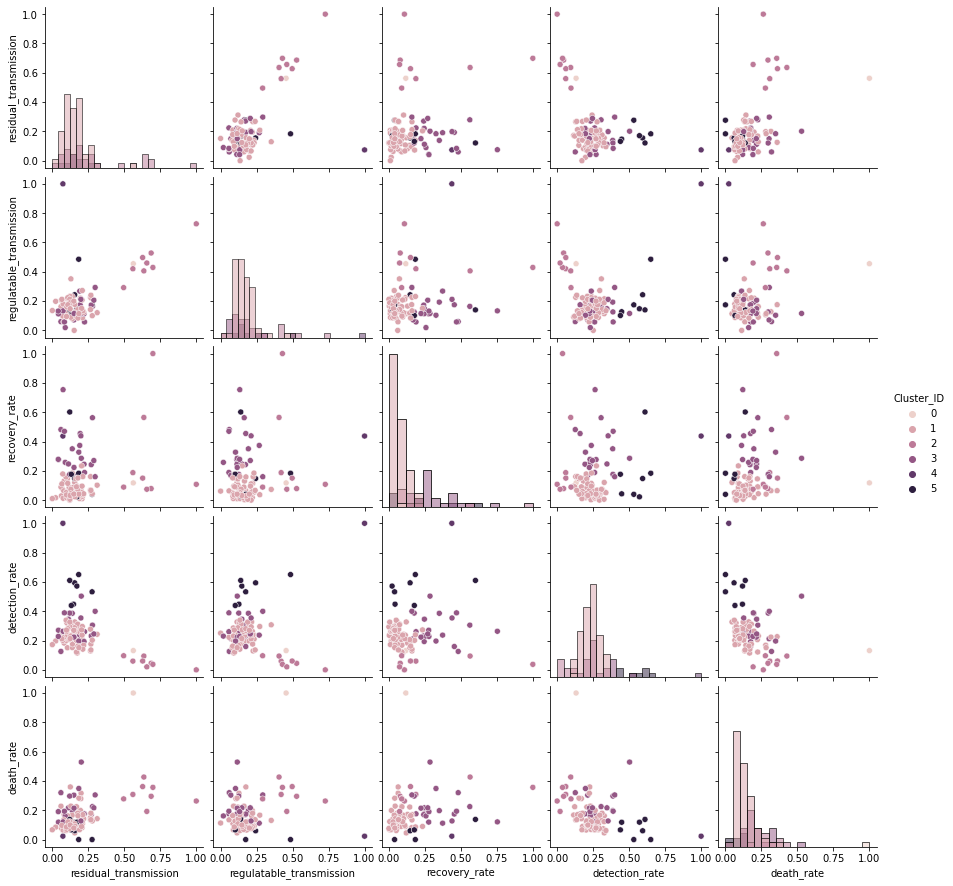

In [49]:
# visualisation of K=4 clustering solution
model = KMeans(n_clusters=6, random_state=rs)
model.fit(X)

# sum of intra-cluster distances
print("Sum of intra-cluster distance:", model.inertia_)

print("Centroid locations:")
for centroid in model.cluster_centers_:
    print(centroid)

y = model.predict(X)
df1c['Cluster_ID'] = y

# how many in each
print("Cluster membership")
print(df1c['Cluster_ID'].value_counts())
# pairplot
# added alpha value to assist with overlapping points
cluster_g = sns.pairplot(df1c, hue='Cluster_ID', diag_kind='hist')
plt.show()

Finding the centroid locations of April data


In [50]:
from sklearn.cluster import KMeans

rs = 42

# set the random state. different random state seeds might result in different centroids locations
model = KMeans(n_clusters=3, random_state=rs)
model.fit(Y)

# sum of intra-cluster distances
print("Sum of intra-cluster distance:", model.inertia_)

print("Centroid locations:")
for centroid in model.cluster_centers_:
    print(centroid)

Sum of intra-cluster distance: 354.53976382312726
Centroid locations:
[-0.24303625 -0.22773638 -0.23771043 -0.30678235  0.0727302 ]
[ 0.44153191  0.92467666  0.68593477  1.73275512 -0.8599104 ]
[ 3.50369238  0.72842151  2.15652135 -1.45439047  2.5903922 ]


In [51]:
# set a different n_clusters
model = KMeans(n_clusters=8, random_state=rs)
model.fit(Y)

# sum of intra-cluster distances
print("Sum of intra-cluster distance:", model.inertia_)

print("Centroid locations:")
for centroid in model.cluster_centers_:
    print(centroid)

Sum of intra-cluster distance: 182.81818054649096
Centroid locations:
[-0.01700072 -0.01490453 -0.6944623   0.25861491 -0.62705408]
[-0.34674403 -0.67064104  2.14781749 -0.25010581  0.7901928 ]
[ 0.45484071 -0.23103775 -0.19666955 -0.1790708   1.47886948]
[ 0.50080505  1.02703723  0.80730298  1.97537466 -0.89947057]
[ 1.86730593  6.65547347 -0.42231731  2.75041358 -1.14159755]
[-0.6078493  -0.3445365  -0.54375428 -0.76189594  0.03374441]
[ 4.30837061  1.4653571   1.73012618 -1.49196607  2.41865548]
[-0.23764965 -0.12237707  0.60610738  0.07885839 -0.49651337]


# 3. Visualization: (April)
* a. Visualizing clusters using pairplot

Cluster membership
1    63
3    22
2     8
5     7
0     1
4     1
Name: Cluster_ID, dtype: int64


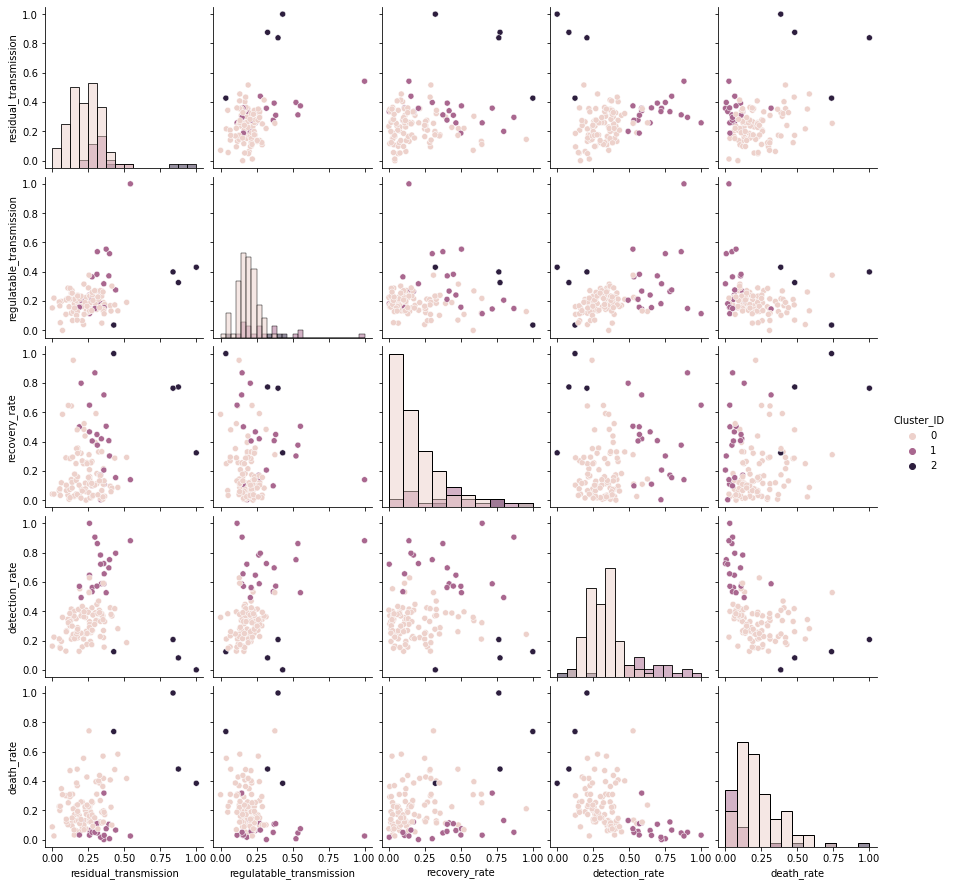

In [52]:
model = KMeans(n_clusters=3, random_state=rs).fit(Y)

# assign cluster ID to each record in X
# Ignore the warning, does not apply to our case here
j = model.predict(Y)
df2c['Cluster_ID'] = j

# how many records are in each cluster
print("Cluster membership")
print(df1c['Cluster_ID'].value_counts())

# pairplot the cluster distribution.
cluster_g = sns.pairplot(df2c, hue='Cluster_ID',diag_kind='hist')
plt.show()

Cluster membership
1    63
3    22
2     8
5     7
0     1
4     1
Name: Cluster_ID, dtype: int64


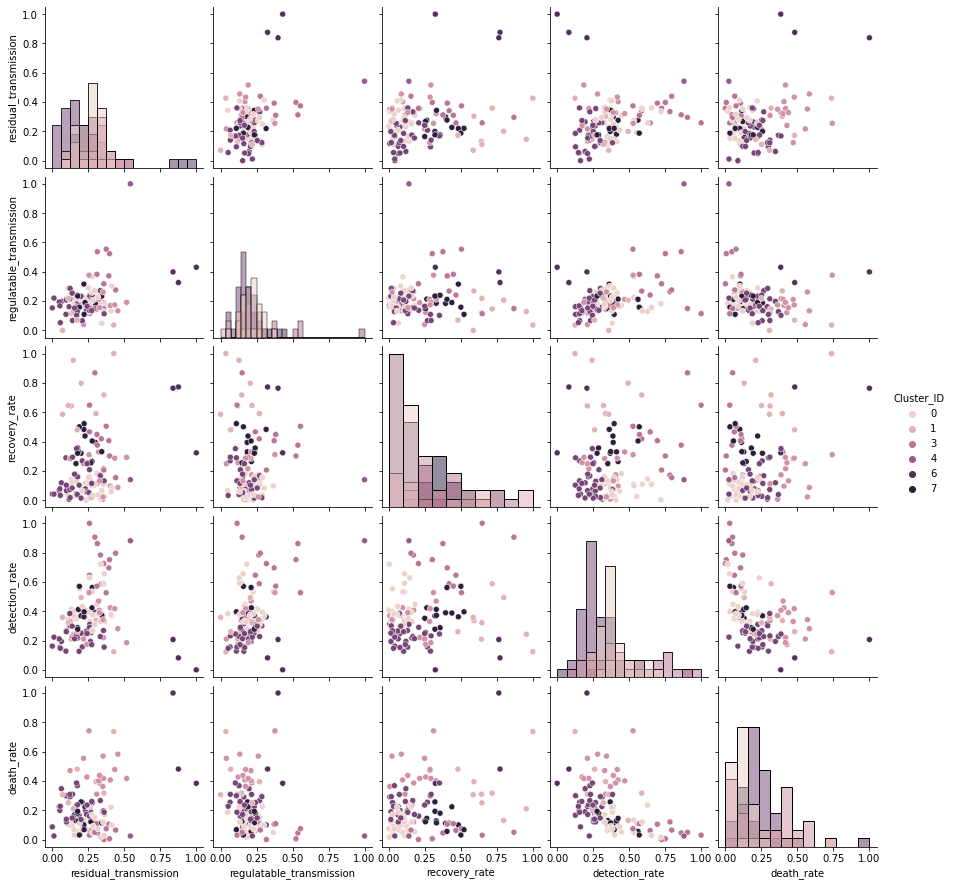

In [53]:
# again, ignore the warning
model = KMeans(n_clusters=8, random_state=rs).fit(Y)

# assign cluster ID to each record in X
# Ignore the warning, does not apply to our case here
j = model.predict(Y)
df2c['Cluster_ID'] = j

# how many records are in each cluster
print("Cluster membership")
print(df1c['Cluster_ID'].value_counts())

# pairplot the cluster distribution.
cluster_g = sns.pairplot(df2c, hue='Cluster_ID',diag_kind='hist')
plt.show()


In [54]:
# list to save the clusters and cost
clusters = []
inertia_vals = []

# this whole process should take a while
for k in range(2, 15, 2):
    # train clustering with the specified K
    model = KMeans(n_clusters=k, random_state=rs, n_jobs=10)
    model.fit(Y)
    
    # append model to cluster list
    clusters.append(model)
    inertia_vals.append(model.inertia_)

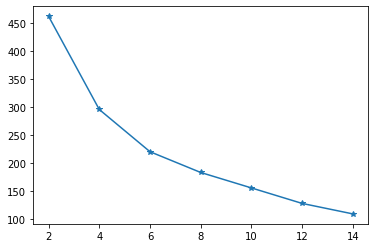

In [55]:
# plot the inertia vs K values
plt.plot(range(2,15,2), inertia_vals, marker='*')
plt.show()


* 2 c) Here, using the the elbow is somewhere between 4 and 6. Either values can be selected as the optimal 𝐾. But this is not enough. Below we have also use the Silhouette score to be more accurate. We used silhouette_score from sklearn to determine the following:

In [56]:
from sklearn.metrics import silhouette_score


print(clusters[2])
print("Silhouette score for k=6", silhouette_score(Y, clusters[2].predict(Y)))

print(clusters[3])
print("Silhouette score for k=8", silhouette_score(Y, clusters[3].predict(Y)))


KMeans(n_clusters=6, n_jobs=10, random_state=42)
Silhouette score for k=6 0.27760835141501256
KMeans(n_jobs=10, random_state=42)
Silhouette score for k=8 0.1990772500891005


A mean silhouette score of 0.27 for $K=6$ and 0.19 for $k=8$ has been shown. This shows clusters in $K=6$ are more appropriately matched to its own cluster than $K=8$. Therefore, we could choose $K=6$ over $K=8$ on the basis of this score.

# Final Visualization: (April)
* 3a. Visualizing clusters using pairplot

Sum of intra-cluster distance: 219.91765247406644
Centroid locations:
[ 0.45484071 -0.23103775 -0.19666955 -0.1790708   1.47886948]
[ 0.27698095  0.17568827  0.2638084   1.23536512 -0.77667278]
[-0.43149431 -0.20107946 -0.53942818 -0.46736867 -0.23050641]
[ 0.95363989  3.73132741  0.43221099  2.07049338 -1.06402682]
[-0.36001388 -0.66729711  1.83875917 -0.22722133  0.60730247]
[ 4.30837061  1.4653571   1.73012618 -1.49196607  2.41865548]
Cluster membership
2    60
1    24
0    15
4    12
3     4
5     3
Name: Cluster_ID, dtype: int64


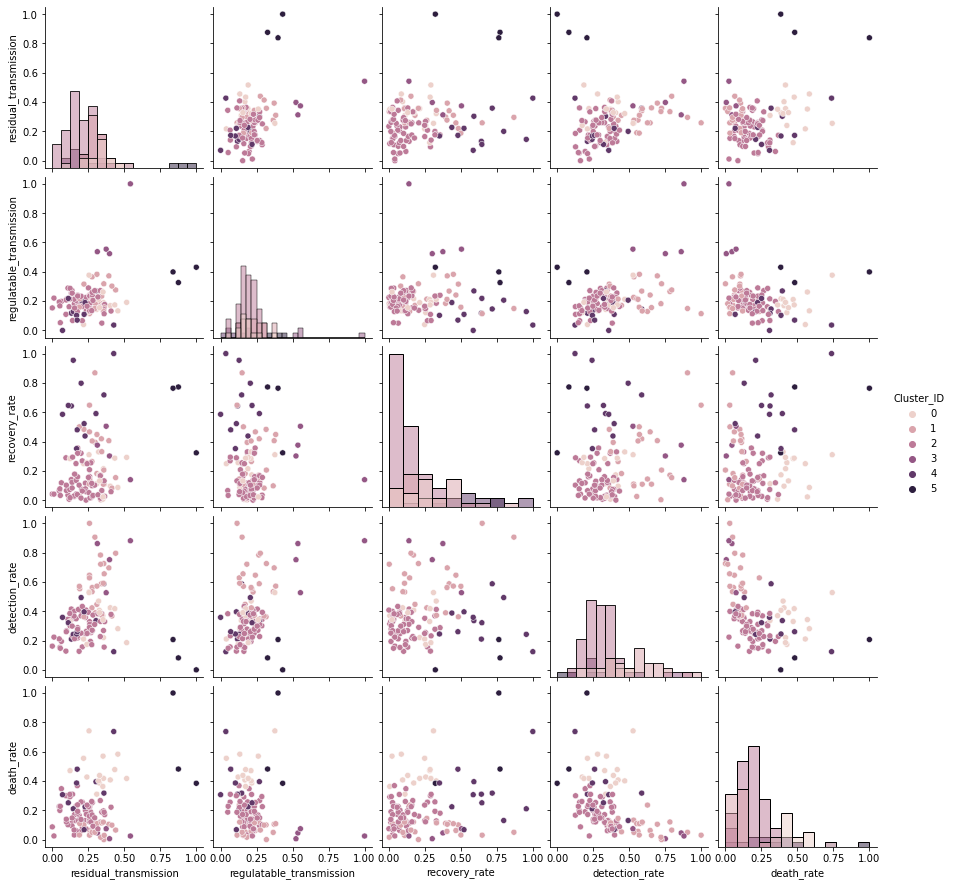

In [57]:
# visualisation of K=4 clustering solution
model = KMeans(n_clusters=6, random_state=rs)
model.fit(Y)

# sum of intra-cluster distances
print("Sum of intra-cluster distance:", model.inertia_)

print("Centroid locations:")
for centroid in model.cluster_centers_:
    print(centroid)

j = model.predict(Y)
df2c['Cluster_ID'] = j

# how many in each
print("Cluster membership")
print(df2c['Cluster_ID'].value_counts())
# pairplot
# added alpha value to assist with overlapping points
cluster_g = sns.pairplot(df2c, hue='Cluster_ID', diag_kind='hist')
plt.show()

Distribution for cluster 0


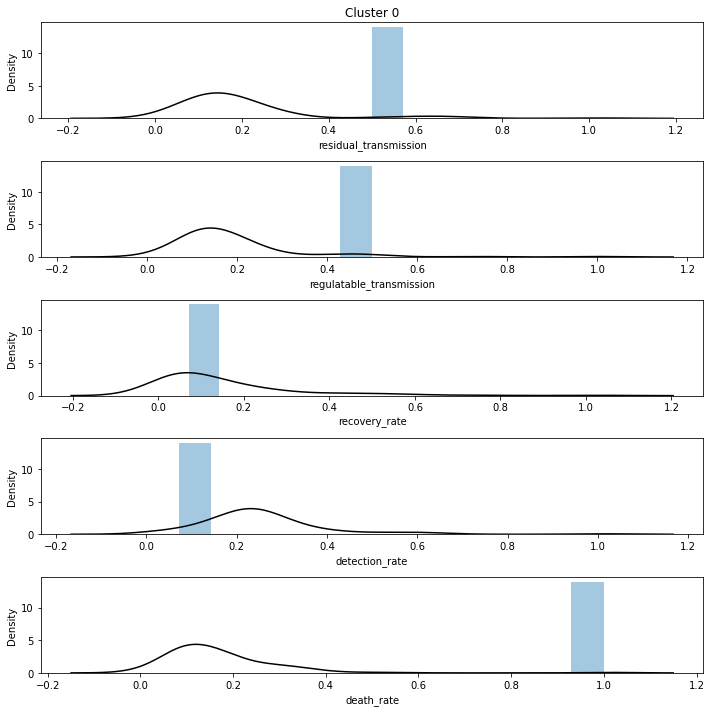

Distribution for cluster 1


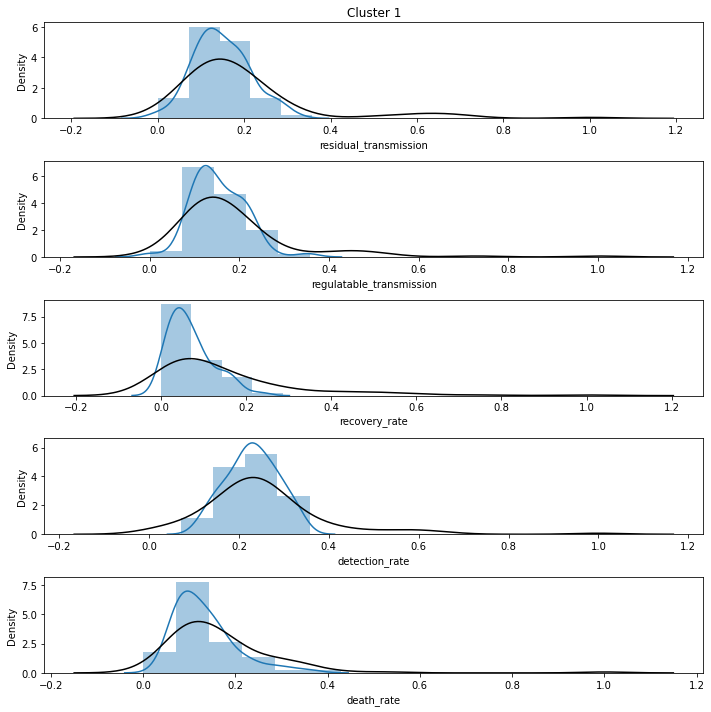

Distribution for cluster 2


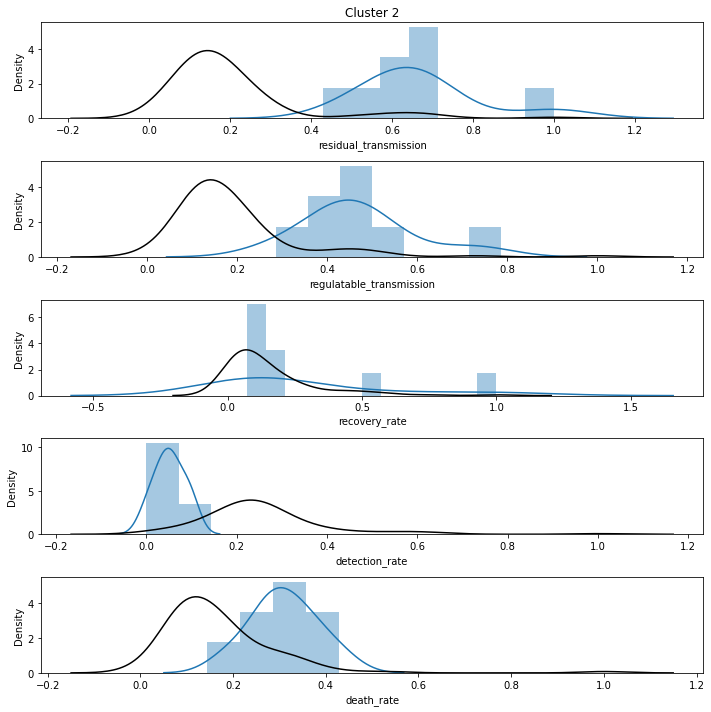

Distribution for cluster 3


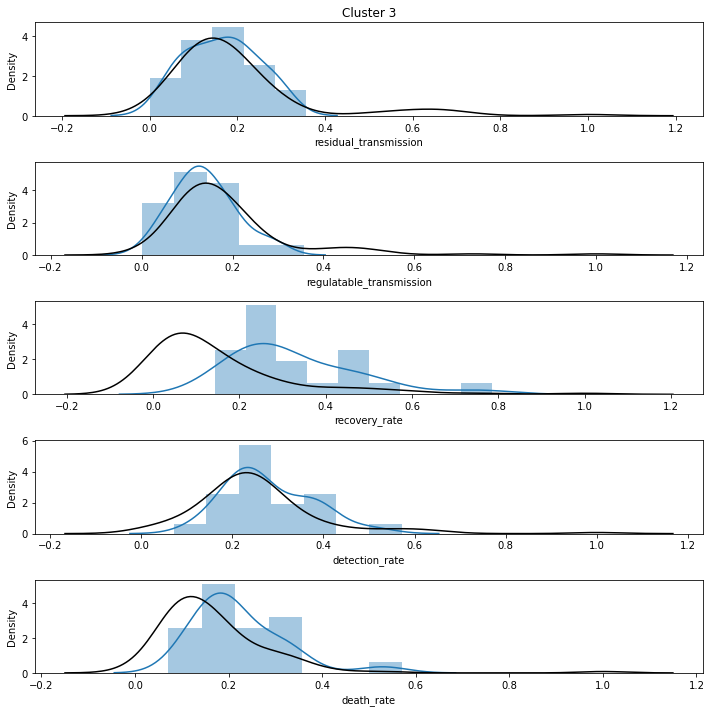

Distribution for cluster 4


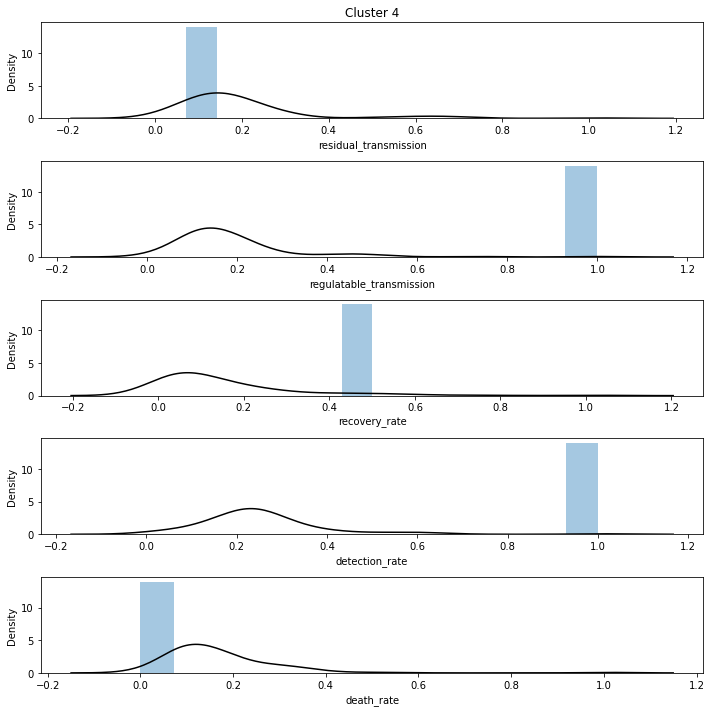

Distribution for cluster 5


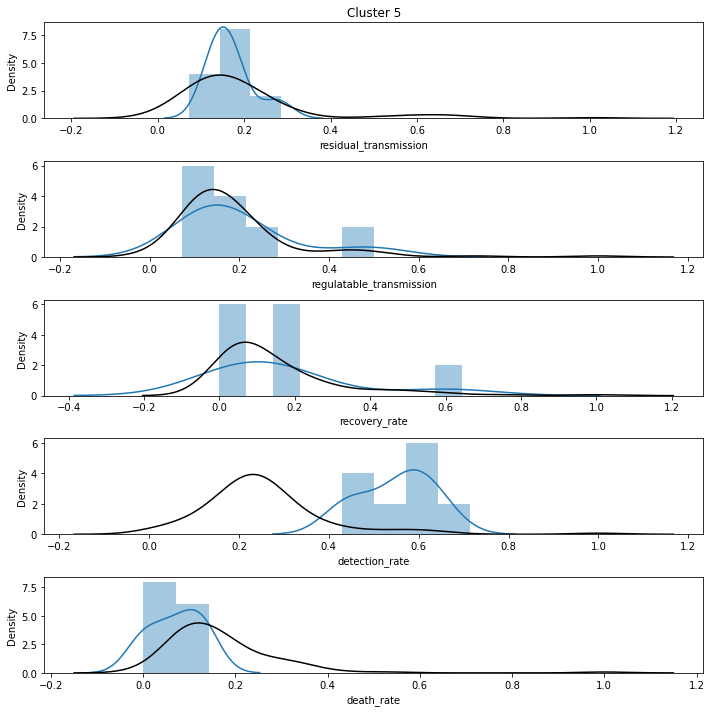

In [58]:
# prepare the column and bin size. Increase bin size to be more specific, but 20 is more than enough
cols = ['residual_transmission', 'regulatable_transmission', 'recovery_rate', 'detection_rate', 'death_rate']
n_bins = 20

# inspecting cluster 0 to 4
clusters_to_inspect = [0,1,2,3,4,5]

for cluster in clusters_to_inspect:
    # inspecting cluster 0
    print("Distribution for cluster {}".format(cluster))

    # create subplots
    fig, ax = plt.subplots(nrows=5, figsize = (10, 10))
    ax[0].set_title("Cluster {}".format(cluster))

    for j, col in enumerate(cols):
        # create the bins
        bins = np.linspace(min(df1c[col]), max(df1c[col]), 15)
        # plot distribution of the cluster using histogram
        sns.distplot(df1c[df1c['Cluster_ID'] == cluster][col], bins=bins, ax=ax[j], norm_hist=True)
        # plot the normal distribution with a black line
        sns.distplot(df1c[col], bins=bins, ax=ax[j], hist=False, color="k")

    plt.tight_layout()
    plt.show()

Distribution for cluster 0


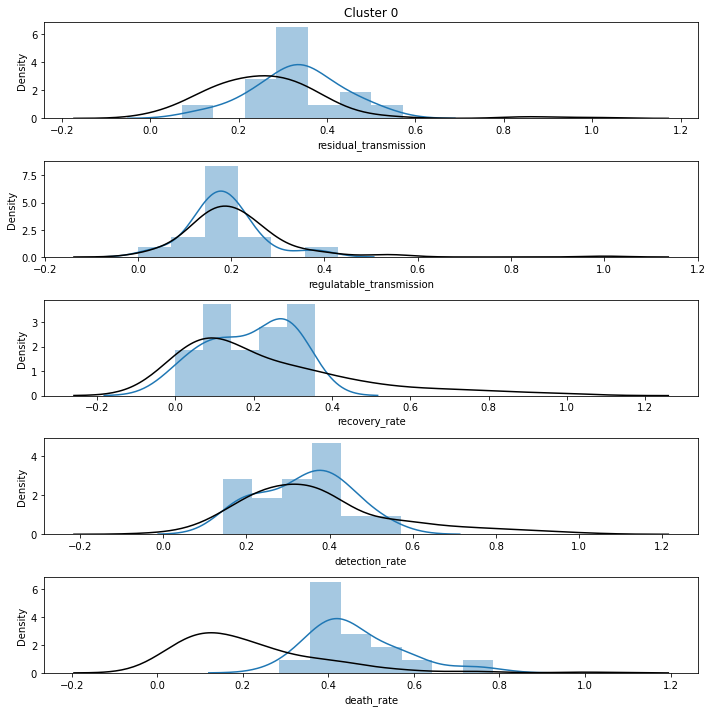

Distribution for cluster 1


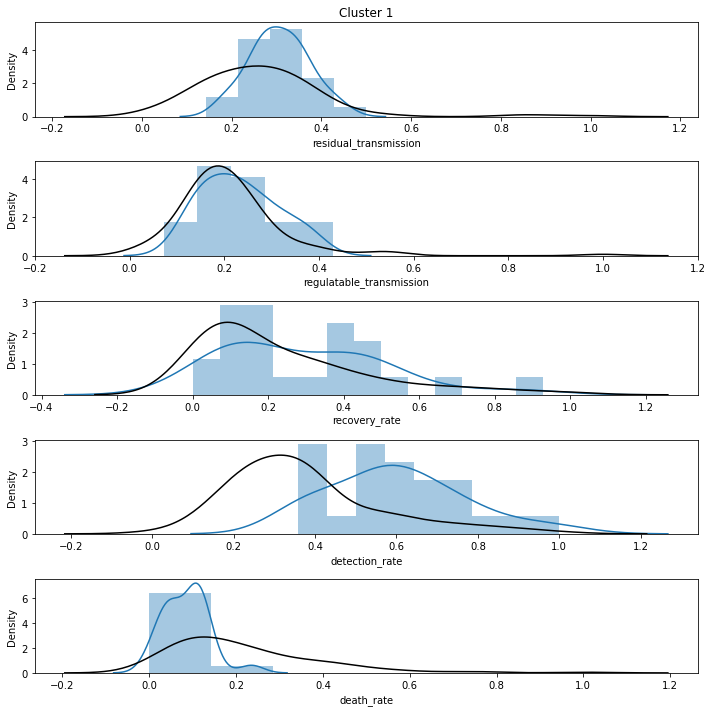

Distribution for cluster 2


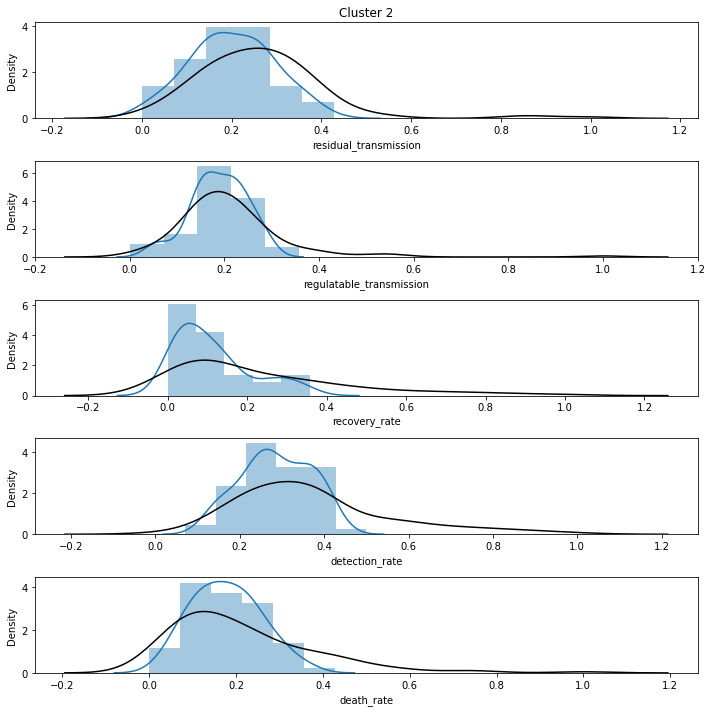

Distribution for cluster 3


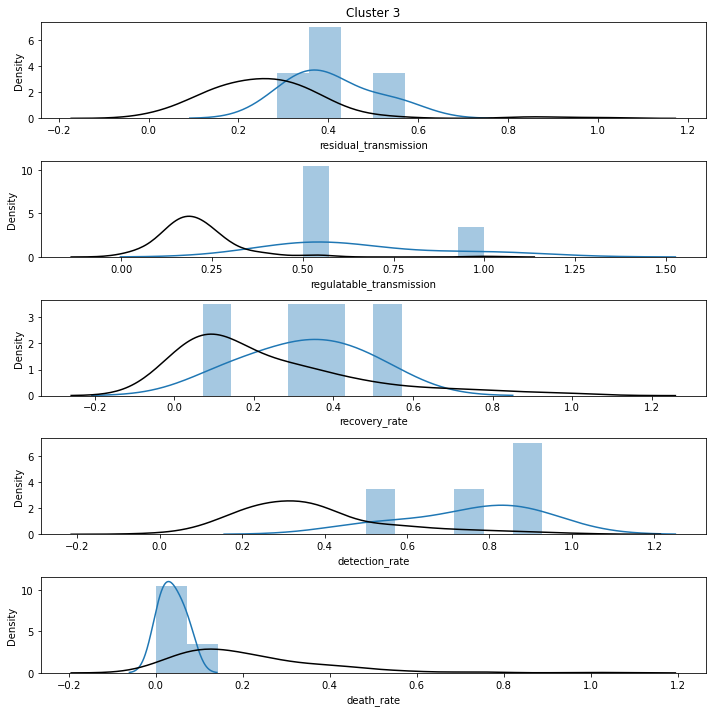

Distribution for cluster 4


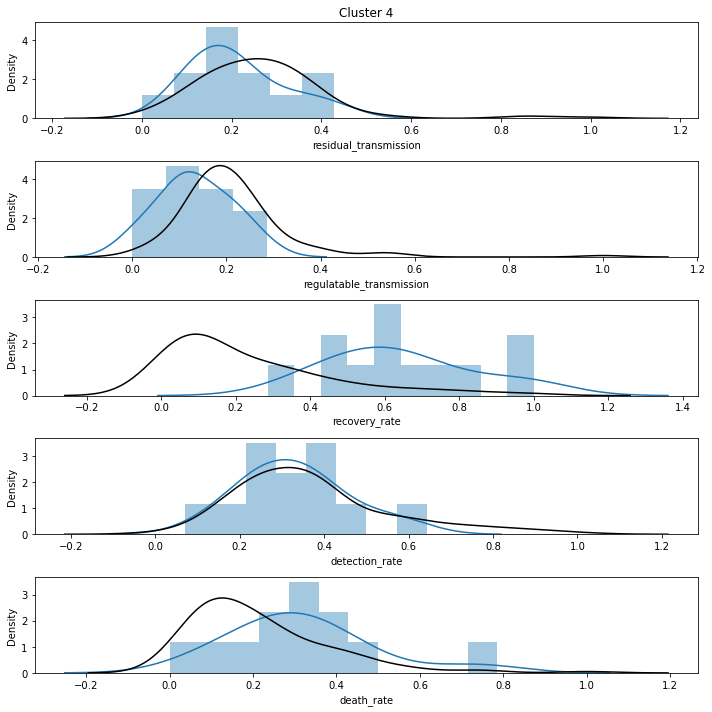

Distribution for cluster 5


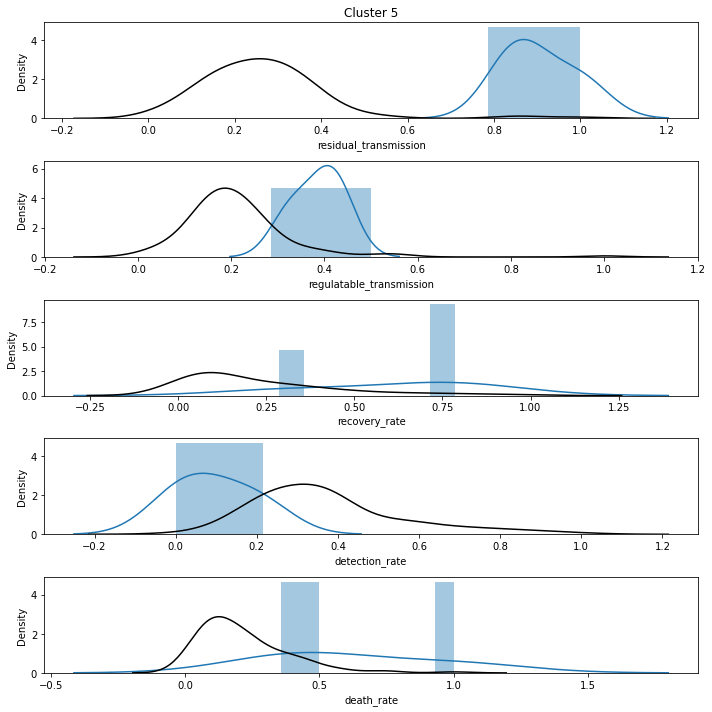

In [59]:
# prepare the column and bin size. Increase bin size to be more specific, but 20 is more than enough
cols = ['residual_transmission', 'regulatable_transmission', 'recovery_rate', 'detection_rate', 'death_rate']
n_bins = 20

# inspecting cluster 0 to 4
clusters_to_inspect = [0,1,2,3,4,5]

for cluster in clusters_to_inspect:
    # inspecting cluster 0
    print("Distribution for cluster {}".format(cluster))

    # create subplots
    fig, ax = plt.subplots(nrows=5, figsize = (10, 10))
    ax[0].set_title("Cluster {}".format(cluster))

    for j, col in enumerate(cols):
        # create the bins
        bins = np.linspace(min(df2c[col]), max(df2c[col]), 15)
        # plot distribution of the cluster using histogram
        sns.distplot(df2c[df2c['Cluster_ID'] == cluster][col], bins=bins, ax=ax[j], norm_hist=True)
        # plot the normal distribution with a black line
        sns.distplot(df2c[col], bins=bins, ax=ax[j], hist=False, color="k")

    plt.tight_layout()
    plt.show()

In [60]:
df1c['Cluster_ID'].head(10)

0    1
1    0
2    1
3    3
4    1
5    1
6    1
7    3
8    3
9    1
Name: Cluster_ID, dtype: int32

In [61]:
df2c['Cluster_ID'].head(10)

0    2
1    2
2    1
3    0
4    0
5    0
6    2
7    4
8    4
9    1
Name: Cluster_ID, dtype: int32

In [62]:
df1c['Cluster_ID'].value_counts()

1    63
3    22
2     8
5     7
0     1
4     1
Name: Cluster_ID, dtype: int64

In [63]:
df2c['Cluster_ID'].value_counts()

2    60
1    24
0    15
4    12
3     4
5     3
Name: Cluster_ID, dtype: int64

## Project (c): Building and Evaluating Predictive models

In [65]:
# imports

#pre-processing libraries
from sklearn.model_selection import train_test_split

#decision tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.tree import export_text

#regression
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFECV, SelectFromModel

#neural networks
from sklearn.neural_network import MLPClassifier

#Common libraries
from sklearn.model_selection import GridSearchCV
from sklearn.tree import export_graphviz
from IPython.core.display import display, HTML 
import pydotplus
import matplotlib.pyplot as plt 
from io import StringIO
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import pickle
import pandas as pd
import numpy as np                                                   
import warnings                     
from IPython.display import Image

In [66]:
#import data
data_pred = "D3.csv"
df = pd.read_csv(data_pred)

In [67]:
# Pre-processing 
def data_prep(df):
    df['contacts_count'].astype('int64')
    df.drop(['insurance','immigrant'], axis=1,inplace=True)

    # one-hot encoding
    df = pd.get_dummies(df)

    # target/input split
    y = df['covid19_positive']
    X = df.drop(['covid19_positive'], axis=1)

    # setting random state
    rs = 100

    X_mat = X.to_numpy()
    X_train, X_test, y_train, y_test = train_test_split(X_mat, y, test_size=0.3, stratify=y, random_state=rs)

    return df,X,y,X_train, X_test, y_train, y_test


In [68]:
# Analysing feature importance
def analyse_feature_importance(dm_model, feature_names, n_to_display=20):
    # grab feature importances from the model
    importances = dm_model.feature_importances_
    
    # sort them out in descending order
    indices = np.argsort(importances)
    indices = np.flip(indices, axis=0)

    # limit to 20 features, you can leave this out to print out everything
    indices = indices[:n_to_display]

    for i in indices:
        print(feature_names[i], ':', importances[i])

### Predictive modeling using Decision Tree 


In [69]:
df, x, y, x_train, x_test, y_train, y_test = data_prep(df)

#### Building DecisionTreeClassifier model

In [70]:
model = DecisionTreeClassifier(random_state = rs)
model.fit(x_train, y_train)

DecisionTreeClassifier(random_state=42)

In [71]:
# Training and test accuracy
train_accuracy = model.score(x_train, y_train)
test_accuracy  = model.score(x_test, y_test)
print(f"Train accuracy: {round(train_accuracy*100,4)}%")
print(f"Test accuracy: {round(test_accuracy*100,4)}%")

# Classification report
y_pred = model.predict(x_test)
print("\n",classification_report(y_test, y_pred))

#Precision (also called positive predictive value) is the fraction of relevant instances among the retrieved instances
#Recall (also known as sensitivity) is the fraction of relevant instances that were retrieved

Train accuracy: 100.0%
Test accuracy: 76.9231%

               precision    recall  f1-score   support

           0       0.81      0.82      0.82       973
           1       0.69      0.67      0.68       561

    accuracy                           0.77      1534
   macro avg       0.75      0.75      0.75      1534
weighted avg       0.77      0.77      0.77      1534



In [72]:
tree_size = model.tree_.node_count
tree_rules = model.get_n_leaves()
tree_depth = model.get_depth()

print(f"""Tree Size: {tree_size}
Tree Rules: {tree_rules}
Tree Depth: {tree_depth}""")

Tree Size: 1131
Tree Rules: 566
Tree Depth: 29


In [73]:
# Text representation of tree (graphic is bad quality due to size of tree)
tree_rules = export_text(model, feature_names = list(x.columns))
print(tree_rules)

|--- covid19_symptoms <= 0.50
|   |--- income_med <= 0.50
|   |   |--- nursing_home <= 0.50
|   |   |   |--- house_count <= 4.50
|   |   |   |   |--- covid19_contact <= 0.50
|   |   |   |   |   |--- working_travel critical <= 0.50
|   |   |   |   |   |   |--- country_BR <= 0.50
|   |   |   |   |   |   |   |--- country_EC <= 0.50
|   |   |   |   |   |   |   |   |--- race_white <= 0.50
|   |   |   |   |   |   |   |   |   |--- contacts_count <= 20.50
|   |   |   |   |   |   |   |   |   |   |--- public_transport_count <= 0.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 8
|   |   |   |   |   |   |   |   |   |   |--- public_transport_count >  0.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 5
|   |   |   |   |   |   |   |   |   |--- contacts_count >  20.50
|   |   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |--- race_white >  0.50
|   |   |   |   |   |   |   |   |   |--- risk_mortality <= 12.31
| 

In [74]:
# Feature importance
importances = model.feature_importances_
feature_names = x.columns

# Sorting features
indices = np.argsort(importances)
indices = np.flip(indices, axis=0)

# Top 5
indices = indices[:5]

# Printing attributes
i = 1
for index in indices:
    print(f"{i}. {feature_names[index]} had an importance of {importances[index]}")
    i += 1

1. covid19_symptoms had an importance of 0.18528224948285466
2. income_med had an importance of 0.10405116926227564
3. worried had an importance of 0.07185900062997781
4. risk_mortality had an importance of 0.06839995623525649
5. contacts_count had an importance of 0.06065923609527766


In [75]:
# Grabbing parameters
params = model.get_params()

# Inspecting paramters
print(f"""Criterion: {params['criterion']}
Max depth: {params['max_depth']}
Min samples leaf: {params['min_samples_leaf']}""")

# Criterion → criteria used to determine a metric for each node
# Max depth → max depth
# Min_samples_leaf → number of data points required to make a new leaf

Criterion: gini
Max depth: None
Min samples leaf: 1


In [76]:
# Defining the settings
params = {'criterion': ['gini', 'entropy'],
          'max_depth': range(1, 10),
          'min_samples_leaf': range(0, 20, 5)[1:]}

# Building another tree
gscv_tree = GridSearchCV(param_grid = params, estimator = DecisionTreeClassifier(random_state = rs),
                         return_train_score = True, cv = 10)

gscv_tree.fit(x_train, y_train)
result_set = gscv_tree.cv_results_

optimal_settings = gscv_tree.best_params_

In [77]:
print(f"The optimal settings are: {optimal_settings}")

The optimal settings are: {'criterion': 'entropy', 'max_depth': 9, 'min_samples_leaf': 15}


Question 3

In [78]:
# Training and test accuracy
train_accuracy_gscv = gscv_tree.score(x_train, y_train)
test_accuracy_gscv  = gscv_tree.score(x_test, y_test)
print(f"Train accuracy: {round(train_accuracy_gscv*100,4)}%")
print(f"Test accuracy: {round(test_accuracy_gscv*100,4)}%")

# Classification report (MIGHT BREAK)
y_pred = gscv_tree.predict(x_test)
print("\n",classification_report(y_test, y_pred))

#Precision (also called positive predictive value) is the fraction of relevant instances among the retrieved instances
#Recall (also known as sensitivity) is the fraction of relevant instances that were retrieved

Train accuracy: 82.5273%
Test accuracy: 80.1173%

               precision    recall  f1-score   support

           0       0.82      0.88      0.85       973
           1       0.76      0.67      0.71       561

    accuracy                           0.80      1534
   macro avg       0.79      0.77      0.78      1534
weighted avg       0.80      0.80      0.80      1534



In [79]:
# Various descriptors of the tree
tree_size_gscv  = gscv_tree.best_estimator_.tree_.node_count
tree_rules_gscv = gscv_tree.best_estimator_.get_n_leaves()
tree_depth_gscv = gscv_tree.best_estimator_.get_depth()


print(f"""Tree Size: {tree_size_gscv}
Tree Rules: {tree_rules_gscv}
Tree Depth: {tree_depth_gscv}""")

Tree Size: 161
Tree Rules: 81
Tree Depth: 9


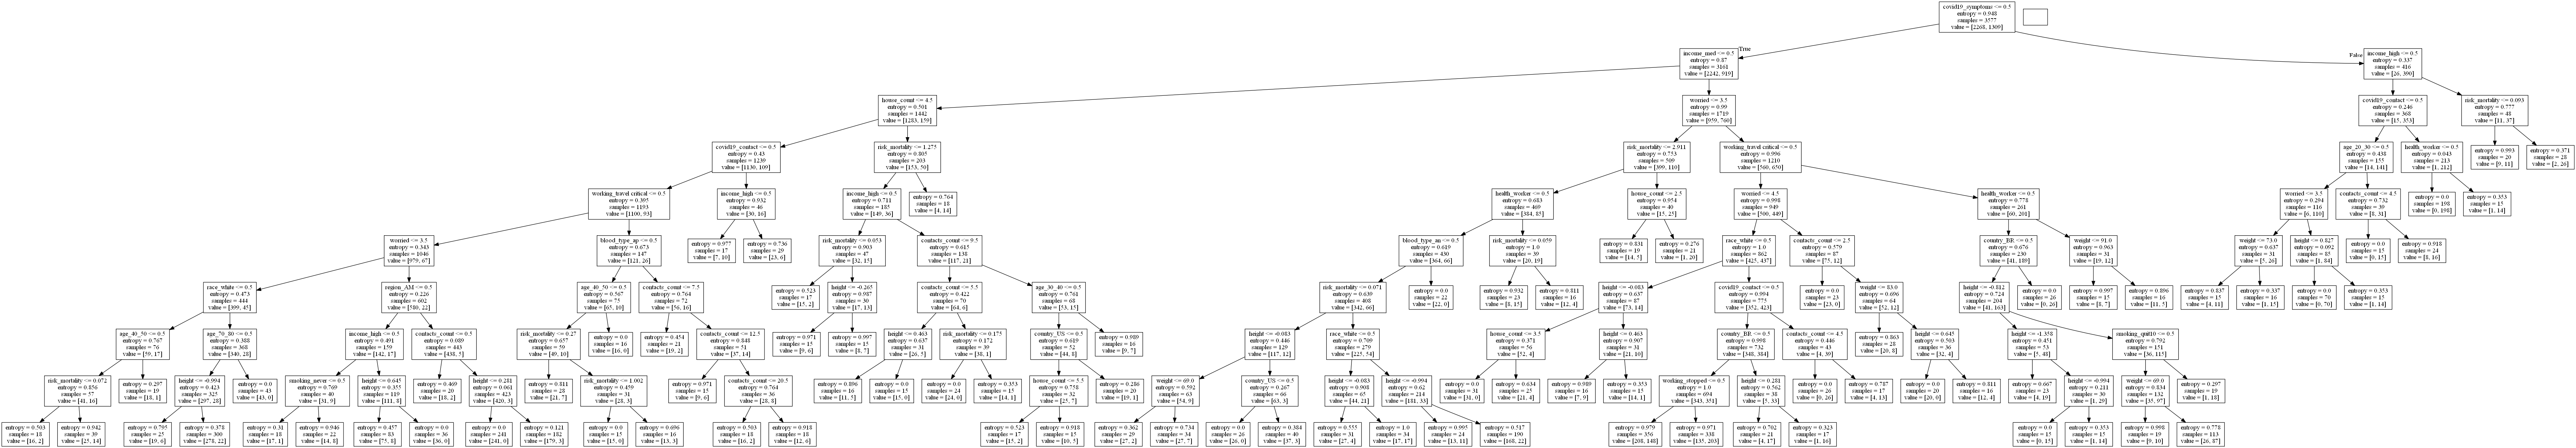

In [80]:
# Specifying writing link function
dotfile = StringIO()

# Drawing and writing the graph
export_graphviz(gscv_tree.best_estimator_, out_file = dotfile, feature_names = x.columns)
graph = pydotplus.graph_from_dot_data(dotfile.getvalue())
graph.write_png("gscv_tree_visualisation.png")

# Displaying the image
Image(filename = "gscv_tree_visualisation.png")

In [81]:
# analyse_feature_importance(gscv_tree.best_estimator_, x.columns, 5)
importances = gscv_tree.best_estimator_.feature_importances_
feature_names = x.columns

# Sorting features
indices = np.argsort(importances)
indices = np.flip(indices, axis=0)

# Top 5
indices = indices[:5]

# Printing attributes
i = 1
for index in indices:
    print(f"{i}. {feature_names[index]} had an importance of {importances[index]}")
    i += 1



1. covid19_symptoms had an importance of 0.3198006539590282
2. income_med had an importance of 0.20766814572142106
3. worried had an importance of 0.10744394041468658
4. risk_mortality had an importance of 0.0467617064666149
5. height had an importance of 0.04386997707306075


Question 4

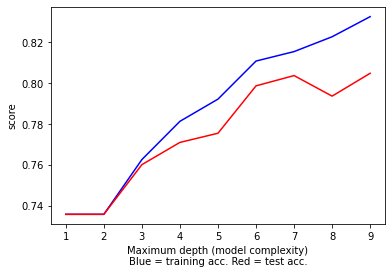

In [82]:
# Stores mean train score
train_result = result_set['mean_train_score']
test_result = result_set['mean_test_score']

# Empty lists for depth assessment on train/test
max_depth_train = []
max_depth_test = []

# Pulling unique parmater tuples
dd = pd.DataFrame(result_set['params'])
index_ = list(dd.index[(dd['criterion'] == 'entropy') & (dd['min_samples_leaf'] == 10)])

# Calculates accuracy score
for i in range(0, len(index_)):
    max_depth_train.append(train_result[index_[i]])
    max_depth_test.append(test_result[index_[i]])

# Plots results
plt.plot(range(1, len(max_depth_train)+1), max_depth_train, 'b', range(1, len(max_depth_test)+1), max_depth_test, 'r')
plt.xlabel('Maximum depth (model complexity)\nBlue = training acc. Red = test acc.')
plt.ylabel('score')
plt.xticks(np.arange(1, len(max_depth_train)+1, 1))
plt.show()

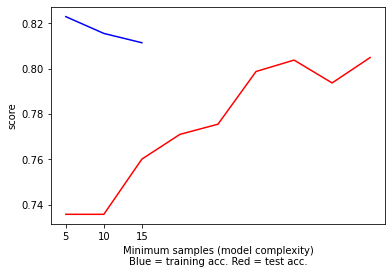

In [83]:
# Empty lists for samples assessment on train/test
min_samples_train = []
min_samples_test = []

# Defines canvas (allows modification of lables)sult[index_[i]])
for i in range(0, len(index_)):
    min_samples_test.append(test_result[index_[i]])

fig, ax = plt.subplots()

# Pulling unique parmater tuples
dd = pd.DataFrame(result_set['params'])
index_ = list(dd.index[(dd['criterion'] == 'entropy') & (dd['max_depth'] == 7)])

# Calculates accuracy score
for i in range(0, len(index_)):
    min_samples_train.append(train_result[index_[i]])
    
# Plotting results
plt.plot(range(1, len(min_samples_train)+1), min_samples_train, 'b', range(1, len(min_samples_test)+1), min_samples_test, 'r')
plt.xlabel('Minimum samples (model complexity)\nBlue = training acc. Red = test acc.')
plt.ylabel('score')
plt.xticks(np.arange(1, len(min_samples_train)+1, 1))

# Relables x-axis (tested in range 0 → 20 by 5)
labels = [item.get_text() for item in ax.get_xticklabels()]
labels[0] = '5'
labels[1] = '10'
labels[2] = '15'
ax.set_xticklabels(labels)

# Showing illustration
plt.show()

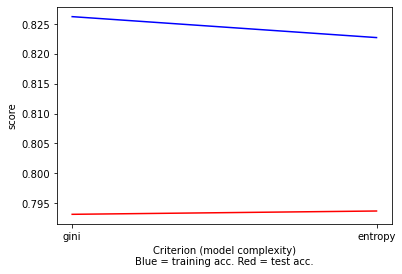

In [84]:
# Empty lists for criterion assessment on train/test
criterion_train = []
criterion_test = []

# Defines canvas (allows modification of lables)
fig, ax = plt.subplots()

# Pulling unique parmater tuples
dd = pd.DataFrame(result_set['params'])
index_ = list(dd.index[(dd['max_depth'] == 8) & (dd['min_samples_leaf'] == 10)])

# Calculates accuracy score
for i in range(0, len(index_)):
    criterion_train.append(train_result[index_[i]])
    criterion_test.append(test_result[index_[i]])

# Plotting results
plt.plot(range(1, len(criterion_train)+1), criterion_train, 'b', range(1, len(criterion_test)+1), criterion_test, 'r')
plt.xlabel('Criterion (model complexity)\nBlue = training acc. Red = test acc.')
plt.ylabel('score')
plt.xticks(np.arange(1, len(criterion_train)+1, 1))

# Relables x-axis (tested in gini and entropy)
labels = [item.get_text() for item in ax.get_xticklabels()]
labels[0] = 'gini'
labels[1] = 'entropy'
ax.set_xticklabels(labels)

# Showing illustration
plt.show()

In [85]:
# Defines model results on test data
y_pred_dt = model.predict(x_test)
y_pred_gscv_tree = gscv_tree.predict(x_test)

# Comments
print(f"Default Settings (Test) Accuracy Score: {round(accuracy_score(y_test, y_pred_dt)*100,4)}%")
print(f"GSCV Optimal Settings (Test) Accuracy Score: {round(accuracy_score(y_test, y_pred_gscv_tree)*100,4)}%")

Default Settings (Test) Accuracy Score: 76.9231%
GSCV Optimal Settings (Test) Accuracy Score: 80.1173%


In [86]:
# Defines best estimator
gscv_tree_best = gscv_tree.best_estimator_

# Probability prediction from decision tree
y_pred_proba_dt = gscv_tree_best.predict_proba(x_test)

# Comments
display(HTML("Probability produced by GSCV decision tree for each class vs actual prediction (False = COVID Negative, True = COVID Positive)."))

# Print top 10
print("(Probs on zero)\t\t(probs on one)\t\t(prediction made)")
for i in range(10):
    print(y_pred_proba_dt[i][0], '\t', y_pred_proba_dt[i][1], '\t', y_pred[i])

(Probs on zero)		(probs on one)		(prediction made)
0.0625 	 0.9375 	 1
0.34782608695652173 	 0.6521739130434783 	 1
0.925 	 0.075 	 0
0.34782608695652173 	 0.6521739130434783 	 1
1.0 	 0.0 	 0
0.9266666666666666 	 0.07333333333333333 	 0
0.9835164835164835 	 0.016483516483516484 	 0
0.47368421052631576 	 0.5263157894736842 	 1
0.9835164835164835 	 0.016483516483516484 	 0
1.0 	 0.0 	 0


In [87]:
# Probablity predictions
y_pred_proba_dt = model.predict_proba(x_test)
y_pred_proba_gscv_tree = gscv_tree_best.predict_proba(x_test)

# Calculates ROC scores (1 is perfect)
roc_index_dt = roc_auc_score(y_test, y_pred_proba_dt[:, 1])
roc_index_dt_cv = roc_auc_score(y_test, y_pred_proba_gscv_tree[:, 1])

# Comments
print(f"ROC index on test for DT_default: {round(roc_index_dt,4)}")
print(f"ROC index on test for DT_optimal: {round(roc_index_dt_cv,4)}")

ROC index on test for DT_default: 0.749
ROC index on test for DT_optimal: 0.8432


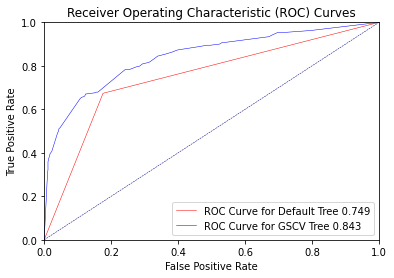

In [88]:
# Score calculations
fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test, y_pred_proba_dt[:,1])
fpr_gscv_tree, tpr_gscv_tree, thresholds_gscv_tree = roc_curve(y_test, y_pred_proba_gscv_tree[:,1])

# Illustration
plt.plot(fpr_dt, tpr_dt, label='ROC Curve for Default Tree {:.3f}'.format(roc_index_dt), color='red', lw=0.5)
plt.plot(fpr_gscv_tree, tpr_gscv_tree, label='ROC Curve for GSCV Tree {:.3f}'.format(roc_index_dt_cv), color='blue', lw=0.5)
plt.plot([0, 1], [0, 1], color='navy', lw=0.5, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend(loc="lower right")
plt.show()

In [89]:
tree_rules = export_text(gscv_tree.best_estimator_, feature_names=list(x.columns))
print(tree_rules)

|--- covid19_symptoms <= 0.50
|   |--- income_med <= 0.50
|   |   |--- house_count <= 4.50
|   |   |   |--- covid19_contact <= 0.50
|   |   |   |   |--- working_travel critical <= 0.50
|   |   |   |   |   |--- worried <= 3.50
|   |   |   |   |   |   |--- race_white <= 0.50
|   |   |   |   |   |   |   |--- age_40_50 <= 0.50
|   |   |   |   |   |   |   |   |--- risk_mortality <= 0.07
|   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |--- risk_mortality >  0.07
|   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |--- age_40_50 >  0.50
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- race_white >  0.50
|   |   |   |   |   |   |   |--- age_70_80 <= 0.50
|   |   |   |   |   |   |   |   |--- height <= -0.99
|   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |--- height >  -0.99
|   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |--- age_70_80 >  0.50
| 

### Generating best result

In [90]:
dt_best = gscv_tree
with open('DT_CV.pickle','wb') as f:
    pickle.dump([dt_best, roc_index_dt_cv, fpr_gscv_tree, tpr_gscv_tree], f)

### Performing logistic regression

In [91]:
df = pd.read_csv(data_pred)

In [92]:
df, X, y, X_train, X_test, y_train, y_test = data_prep(df)

In [93]:


# initialise a standard scaler object
scaler = StandardScaler()

# visualise min, max, mean and standard dev of data before scaling
print("Before scaling\n-------------")
for i in range(5):
    col = X_train[:,i]
    print("Variable #{}: min {}, max {}, mean {:.2f} and std dev {:.2f}".
          format(i, min(col), max(col), np.mean(col), np.std(col)))

# learn the mean and std.dev of variables from training data
# then use the learned values to transform training data
X_train = scaler.fit_transform(X_train, y_train)

print("After scaling\n-------------")
for i in range(5):
    col = X_train[:,i]
    print("Variable #{}: min {}, max {}, mean {:.2f} and std dev {:.2f}".
          format(i, min(col), max(col), np.mean(col), np.std(col)))

# use the statistic that you learned from training to transform test data
# NEVER learn from test data, this is supposed to be a set of dataset
# that the model has never seen before
X_test = scaler.transform(X_test)

Before scaling
-------------
Variable #0: min -5.63615808, max 6.015739563, mean -0.01 and std dev 1.00
Variable #1: min 44.0, max 180.0, mean 83.75 and std dev 23.07
Variable #2: min 0.0, max 21.0, mean 7.55 and std dev 6.54
Variable #3: min 1.0, max 11.0, mean 3.01 and std dev 1.69
Variable #4: min 0.0, max 15.0, mean 0.27 and std dev 1.42
After scaling
-------------
Variable #0: min -5.6119885781726975, max 6.000757474147325, mean 0.00 and std dev 1.00
Variable #1: min -1.723166529538055, max 4.17243689103385, mean 0.00 and std dev 1.00
Variable #2: min -1.1545913841429356, max 2.056262024488997, mean 0.00 and std dev 1.00
Variable #3: min -1.1921674724462903, max 4.733055605142122, mean 0.00 and std dev 1.00
Variable #4: min -0.1881734989621392, max 10.395106466251255, mean 0.00 and std dev 1.00


In [94]:
model = LogisticRegression(random_state=rs)

# fit it to training data
model.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [95]:
# training and test accuracy
print("Train accuracy:", model.score(X_train, y_train))
print("Test accuracy:", model.score(X_test, y_test))

# classification report on test data
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

Train accuracy: 0.8205199888174448
Test accuracy: 0.7790091264667536
              precision    recall  f1-score   support

           0       0.80      0.87      0.83       973
           1       0.74      0.62      0.67       561

    accuracy                           0.78      1534
   macro avg       0.77      0.75      0.75      1534
weighted avg       0.78      0.78      0.77      1534



In [96]:
print(model.coef_)

[[-0.20595726  0.25810384 -0.117946    0.26354084  0.00145595  0.20129862
   0.98583437  0.3689146  -0.01479835  0.12451243  0.05037499  0.06403888
   0.12062367 -0.06812864  0.10792014  0.09362603 -0.04595667  0.06043253
   0.13739699 -0.09533778 -0.16807499 -0.2909377   0.03805923  0.08640445
  -0.04690093 -0.07988319  0.1080299  -0.06028293  0.01656076  0.11346406
  -0.17731936 -0.12280911 -0.10137947 -0.09732422 -0.17105654  0.169449
  -0.00509342 -0.00835761  0.          0.22478392 -0.05339377 -0.09674911
  -0.03938952  0.10534562  0.01297654  0.         -0.07645086 -0.06310769
   0.0646265   0.03947645  0.          0.03800347  0.137553   -0.04452738
   0.11940711 -0.10128643  0.01735398  0.09603139  0.         -0.03870135
  -0.0938171   0.01929708 -0.08298328 -0.25583045  0.05887154 -0.03131952
  -0.14102359  0.01498261  0.03766726  0.0482963   0.04901186  0.08729072
   0.01724623 -0.05536091 -0.13713453 -0.14252254 -0.02295054  0.
  -0.1400831  -0.05798328  0.          0.0036146

In [97]:
feature_names = X.columns
coef = model.coef_[0]

# limit to 20 features, you can comment the following line to print out everything
coef = coef[:20]

for i in range(len(coef)):
    print(feature_names[i], ':', coef[i])

height : -0.20595726005834195
weight : 0.2581038406199431
contacts_count : -0.11794600378496042
house_count : 0.2635408391191321
public_transport_count : 0.0014559521730616492
worried : 0.20129862064622275
covid19_symptoms : 0.985834373439167
covid19_contact : 0.3689145978556456
asthma : -0.014798350900719452
kidney_disease : 0.1245124254856888
liver_disease : 0.0503749880081859
compromised_immune : 0.06403888243752869
heart_disease : 0.12062367417137232
lung_disease : -0.06812863835487369
diabetes : 0.10792013595469165
hiv_positive : 0.09362602526532779
hypertension : -0.04595666859969405
other_chronic : 0.06043253254492311
nursing_home : 0.13739698584572477
health_worker : -0.0953377847359777


In [98]:
# grab feature importances from the model and feature name from the original X
coef = model.coef_[0]
feature_names = X.columns

# sort them out in descending order
indices = np.argsort(np.absolute(coef))
indices = np.flip(indices, axis=0)

# limit to 20 features, you can leave this out to print out everything
indices = indices[:20]

for i in indices:
    print(feature_names[i], ':', coef[i])

covid19_symptoms : 0.985834373439167
income_high : -0.502688024439898
income_med : 0.49978437219193617
working_travel critical : 0.42032184274666207
covid19_contact : 0.3689145978556456
region_AF : -0.29093770229481164
house_count : 0.2635408391191321
weight : 0.2581038406199431
country_HR : -0.2558304488835821
country_PL : -0.24633147479749112
country_ZA : 0.23353900072060513
working_travel non critical : -0.23190553125729724
country_BR : 0.22478391597509081
height : -0.20595726005834195
worried : 0.20129862064622275
country_PK : 0.19461520833388427
age_90_100 : 0.18962569022496528
country_AR : -0.1773193582831585
working_never : -0.17582414760454526
age_100_110 : 0.17400439551041458


In [99]:
# grid search CV
params = {'C': [pow(10, x) for x in range(-6, 4)]}

# use all cores to tune logistic regression with C parameter
cv = GridSearchCV(param_grid=params, estimator=LogisticRegression(random_state=rs),return_train_score=True, cv=10, n_jobs=-1)
cv.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(random_state=42), n_jobs=-1,
             param_grid={'C': [1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10,
                               100, 1000]},
             return_train_score=True)

In [100]:
result_set = cv.cv_results_
print(result_set)

{'mean_fit_time': array([0.22081997, 0.12336967, 0.09173377, 0.08423135, 0.13529856,
       0.2526998 , 0.38698826, 0.49980295, 0.4501384 , 0.28299863]), 'std_fit_time': array([0.05655325, 0.04337892, 0.01896621, 0.01532602, 0.0195943 ,
       0.02160499, 0.11566072, 0.09512633, 0.08718736, 0.08004705]), 'mean_score_time': array([0.0062552 , 0.00469179, 0.00156338, 0.00156193, 0.        ,
       0.00473473, 0.00685682, 0.00156229, 0.00317075, 0.        ]), 'std_score_time': array([0.00766103, 0.00716684, 0.00469015, 0.00468578, 0.        ,
       0.01012966, 0.01187733, 0.00468686, 0.0063421 , 0.        ]), 'param_C': masked_array(data=[1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100,
                   1000],
             mask=[False, False, False, False, False, False, False, False,
                   False, False],
       fill_value='?',
            dtype=object), 'params': [{'C': 1e-06}, {'C': 1e-05}, {'C': 0.0001}, {'C': 0.001}, {'C': 0.01}, {'C': 0.1}, {'C': 1}, {'C': 10}, {'C'

Total number of models:  10


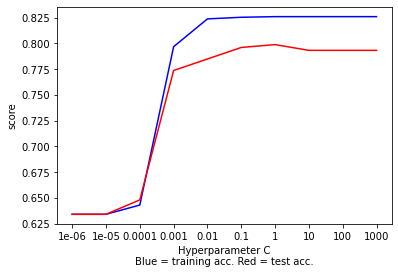

In [101]:
import matplotlib.pyplot as plt
train_result = result_set['split0_train_score']
test_result = result_set['split0_test_score']
print("Total number of models: ", len(test_result))
# plot Hyperparameter C values vs training and test accuracy score
plt.plot(range(0, len(train_result)), train_result, 'b', range(0,len(test_result)), test_result, 'r')
plt.xlabel('Hyperparameter C\nBlue = training acc. Red = test acc.')
plt.xticks(range(0, len(train_result)),[pow(10, x) for x in range(-6, 4)])
plt.ylabel('score')
plt.show()

Total number of models:  10


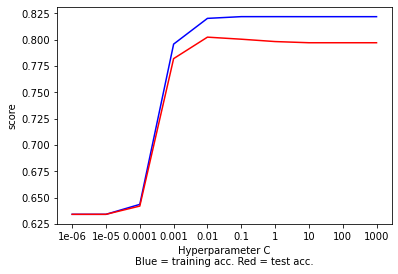

In [102]:
train_result = result_set['mean_train_score']
test_result = result_set['mean_test_score']
print("Total number of models: ", len(test_result))
# plot Hyperparameter C values vs training and test accuracy score
plt.plot(range(0, len(train_result)), train_result, 'b', range(0,len(test_result)), test_result, 'r')
plt.xlabel('Hyperparameter C\nBlue = training acc. Red = test acc.')
plt.xticks(range(0, len(train_result)),[pow(10, x) for x in range(-6, 4)])
plt.ylabel('score')
plt.show()

In [103]:
print(cv.best_params_)

{'C': 0.01}


In [104]:
cv.fit(X_train, y_train)

print("Train accuracy:", cv.score(X_train, y_train))
print("Test accuracy:", cv.score(X_test, y_test))

Train accuracy: 0.8191221694157115
Test accuracy: 0.7822685788787483


In [105]:


rfe = RFECV(estimator = LogisticRegression(random_state=rs), cv=10)
rfe.fit(X_train, y_train) # run the RFECV

# comparing how many variables before and after
print("Original feature set", X_train.shape[1])
print("Number of features after elimination", rfe.n_features_)

Original feature set 164
Number of features after elimination 123


In [106]:
X_train_sel = rfe.transform(X_train)
X_test_sel = rfe.transform(X_test)

In [107]:
# grid search CV
params = {'C': [pow(10, x) for x in range(-6, 4)]}

rfe_cv = GridSearchCV(param_grid=params, estimator=LogisticRegression(random_state=rs), cv=10, n_jobs=-1)
rfe_cv.fit(X_train_sel, y_train)

# test the best model
print("Train accuracy:", rfe_cv.score(X_train_sel, y_train))
print("Test accuracy:", rfe_cv.score(X_test_sel, y_test))

y_pred = rfe_cv.predict(X_test_sel)
print(classification_report(y_test, y_pred))

# print parameters of the best model
print(rfe_cv.best_params_)

Train accuracy: 0.8194017332960581
Test accuracy: 0.7842242503259452
              precision    recall  f1-score   support

           0       0.79      0.89      0.84       973
           1       0.76      0.60      0.67       561

    accuracy                           0.78      1534
   macro avg       0.78      0.74      0.75      1534
weighted avg       0.78      0.78      0.78      1534

{'C': 0.01}


### 5.2. Feature selection using another model

We will explore another mdethod of feature selection "select from model". A machine learning model with the ability to find feature importance can be used to select features with high importance. Typically, decision tree or support vector machine models are used in this method. Recall from the previous practical that decision trees can compute feature importance internally through the tree structure. Therefore, we will use the best decision tree as "selecting model" to use the high quality subset of variables.

Tip: You can use `pickle.load` to load the `DT_CV.pickle` that we have build as part of the decision tree practical.

In [108]:
import pickle
with open('DT_CV.pickle', 'rb') as f:
    dt_best,roc_index_dt_cv, fpr_dt_cv, tpr_dt_cv = pickle.load(f)
#dt_best.fit(X_train, y_train)

print(dt_best.best_params_)

{'criterion': 'entropy', 'max_depth': 9, 'min_samples_leaf': 15}


In [109]:
# analyse feature importance from the tuned decision tree
analyse_feature_importance(dt_best.best_estimator_, X.columns)

covid19_symptoms : 0.3198006539590282
income_med : 0.20766814572142106
worried : 0.10744394041468658
risk_mortality : 0.0467617064666149
height : 0.04386997707306075
working_travel critical : 0.04363211613846948
covid19_contact : 0.03336831061010922
race_white : 0.03275753294031491
house_count : 0.031521514545638375
health_worker : 0.023526260130011092
contacts_count : 0.022100660970282834
income_high : 0.017026923100506006
country_BR : 0.014910673871978534
region_AM : 0.01194184107126659
working_stopped : 0.011002081092302708
weight : 0.006225214501125883
age_40_50 : 0.004839249783908826
blood_type_an : 0.003481019415376033
age_70_80 : 0.003348470707766873
age_20_30 : 0.0033280197095969257


The output shows there are only 20 features with importance value more than 0. According to the tuned decision tree, there are only 15 important features in this dataset for prediction. This decision tree can be used to perform feature selection.

Import `SelectFromModel` module from `sklearn.feature_selection`.

In [110]:


# use the trained best decision tree from GridSearchCV to select features
# supply the prefit=True parameter to stop SelectFromModel to re-train the model
selectmodel = SelectFromModel(dt_best.best_estimator_, prefit=True)
X_train_sel_model = selectmodel.transform(X_train)
X_test_sel_model = selectmodel.transform(X_test)

print(X_train_sel_model.shape)

(3577, 16)


In [111]:
params = {'C': [pow(10, x) for x in range(-6, 4)]}

### For the params given, build a logistic regression model with GridSearch.

cv_sel_model = GridSearchCV(param_grid=params, estimator=LogisticRegression(random_state=rs), cv=10, n_jobs=-1)
cv_sel_model.fit(X_train_sel_model, y_train)

print("Train accuracy:", cv_sel_model.score(X_train_sel_model, y_train))
print("Test accuracy:", cv_sel_model.score(X_test_sel_model, y_test))

# test the best model
y_pred = cv_sel_model.predict(X_test_sel_model)
print(classification_report(y_test, y_pred))

# print parameters of the best model
print(cv_sel_model.best_params_)

Train accuracy: 0.7973161867486721
Test accuracy: 0.7790091264667536
              precision    recall  f1-score   support

           0       0.79      0.89      0.84       973
           1       0.75      0.59      0.66       561

    accuracy                           0.78      1534
   macro avg       0.77      0.74      0.75      1534
weighted avg       0.78      0.78      0.77      1534

{'C': 10}


## Comparision and finding the best performing model<a name="compare"></a>

A total of four models has been built:
    1. Default logistic regression (`model`)
    2. Logistic regression + grid search (`cv`)
    3. Logistic regression + feature selection using RFE + grid search (`rfe_cv`)
    4. Logistic regression + feature selection using DT + grid search (`cv_sel_model`)
    
Now, use ROC curve to compare these models along with the best performing decision tree and identify the best performing model.

In [112]:
### Enter your code 
from sklearn.metrics import roc_auc_score

y_pred_proba_lr = model.predict_proba(X_test)
y_pred_proba_lr_cv = cv.predict_proba(X_test)
y_pred_proba_rfe_cv = rfe_cv.predict_proba(X_test_sel)
y_pred_proba_cv_sel_model = cv_sel_model.predict_proba(X_test_sel_model)


roc_index_lr = roc_auc_score(y_test, y_pred_proba_lr[:, 1])
roc_index_lr_cv = roc_auc_score(y_test, y_pred_proba_lr_cv[:, 1])
roc_index_rfe_cv = roc_auc_score(y_test, y_pred_proba_rfe_cv[:, 1])
roc_index_cv_sel_model = roc_auc_score(y_test, y_pred_proba_cv_sel_model[:, 1])

print("ROC index on test for `model`:", roc_index_lr)
print("ROC index on test for `cv`:", roc_index_lr_cv)
print("ROC index on test for `rfe_cv`:", roc_index_rfe_cv)
print("ROC index on test for `cv_sel_model`:", roc_index_cv_sel_model)

ROC index on test for `model`: 0.835356771878143
ROC index on test for `cv`: 0.8397444000490975
ROC index on test for `rfe_cv`: 0.8393670090665435
ROC index on test for `cv_sel_model`: 0.8358092746581957


In [113]:

fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test, y_pred_proba_lr[:,1])
fpr_lr_cv, tpr_lr_cv, thresholds_lr_cv = roc_curve(y_test, y_pred_proba_lr_cv[:,1])
fpr_rfe_cv, tpr_rfe_cv, thresholds_rfe_cv = roc_curve(y_test, y_pred_proba_rfe_cv[:,1])
fpr_cv_sel_model, tpr_cv_sel_model, thresholds_cv_sel_model = roc_curve(y_test, y_pred_proba_cv_sel_model[:,1])

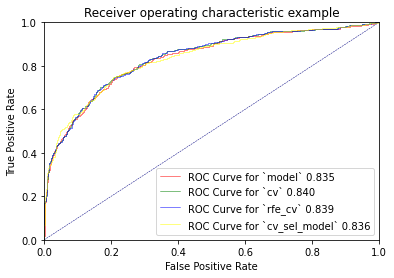

In [114]:

plt.plot(fpr_lr, tpr_lr, label='ROC Curve for `model` {:.3f}'.format(roc_index_lr), color='red', lw=0.5)
plt.plot(fpr_lr_cv, tpr_lr_cv, label='ROC Curve for `cv` {:.3f}'.format(roc_index_lr_cv), color='green', lw=0.5)
plt.plot(fpr_rfe_cv, tpr_rfe_cv, label='ROC Curve for `rfe_cv` {:.3f}'.format(roc_index_rfe_cv), color='blue', lw=0.5)
plt.plot(fpr_cv_sel_model, tpr_cv_sel_model, label='ROC Curve for `cv_sel_model` {:.3f}'.format(roc_index_cv_sel_model), color='yellow', lw=0.5)


plt.plot([0, 1], [0, 1], color='navy', lw=0.5, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [115]:
### Enter your code
lr_best = cv_sel_model
roc_index_lr_best = roc_index_cv_sel_model
tpr_lr_best = tpr_cv_sel_model
fpr_lr_best = fpr_cv_sel_model
with open('LR.pickle', 'wb') as f:
    pickle.dump([lr_best,roc_index_lr_best, fpr_lr_best, tpr_lr_best], f)

## Predictive modeling using Neural Networks 


In [116]:
df= pd.read_csv(data_pred)

In [117]:
df, X, y, X_train, X_test, y_train, y_test = data_prep(df)


### Building the model using default settings

In [118]:
model_1 = MLPClassifier(random_state=rs)
model_1.fit(X_train, y_train)

print("Train accuracy:", model_1.score(X_train, y_train))
print("Test accuracy:", model_1.score(X_test, y_test))

y_pred = model_1.predict(X_test)
print(classification_report(y_test, y_pred))

print(model_1)

Train accuracy: 0.8764327648867767
Test accuracy: 0.7835723598435462
              precision    recall  f1-score   support

           0       0.80      0.88      0.84       973
           1       0.75      0.61      0.67       561

    accuracy                           0.78      1534
   macro avg       0.77      0.75      0.76      1534
weighted avg       0.78      0.78      0.78      1534

MLPClassifier(random_state=42)


**Default settings with max iterations**

In [119]:
model_2 = MLPClassifier(max_iter=700, random_state=rs)
model_2.fit(X_train, y_train)

print("Train accuracy:", model_2.score(X_train, y_train))
print("Test accuracy:", model_2.score(X_test, y_test))

y_pred = model_2.predict(X_test)
print(classification_report(y_test, y_pred))

print(model_2)

Train accuracy: 0.8985183114341627
Test accuracy: 0.788135593220339
              precision    recall  f1-score   support

           0       0.83      0.84      0.83       973
           1       0.71      0.70      0.71       561

    accuracy                           0.79      1534
   macro avg       0.77      0.77      0.77      1534
weighted avg       0.79      0.79      0.79      1534

MLPClassifier(max_iter=700, random_state=42)


In [120]:
model_2.n_iter_

266

#### Using GridSearchCV

In [121]:
print(X_train.shape)

(3577, 164)


In [122]:
params = {'hidden_layer_sizes': [(x,) for x in range(5, 164, 10)]}

cv_1 = GridSearchCV(param_grid=params, estimator=MLPClassifier(random_state= 350, max_iter= 700),return_train_score=True, cv=10, n_jobs=-1)
cv_1.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=MLPClassifier(max_iter=700, random_state=350),
             n_jobs=-1,
             param_grid={'hidden_layer_sizes': [(5,), (15,), (25,), (35,),
                                                (45,), (55,), (65,), (75,),
                                                (85,), (95,), (105,), (115,),
                                                (125,), (135,), (145,),
                                                (155,)]},
             return_train_score=True)

In [123]:
result_set = cv_1.cv_results_
print(result_set)

{'mean_fit_time': array([ 3.4645628 ,  6.95454512,  8.00380054, 14.42657506, 18.89917228,
       16.67468846, 20.33065262, 27.69972775, 30.74600999, 36.50321529,
       34.69173472, 43.64756784, 49.49608119, 49.44259503, 58.11496828,
       49.69225855]), 'std_fit_time': array([ 0.32259053,  1.76845028,  1.57922574,  3.5068814 ,  3.24471376,
        5.64511729,  7.10318707,  4.72739576,  4.14431995,  7.54801007,
       10.89339008, 12.67574489, 18.93651405, 13.53768134, 16.95867489,
       16.02118043]), 'mean_score_time': array([0.00469143, 0.00156145, 0.00508187, 0.00312498, 0.00156205,
       0.00392776, 0.00220459, 0.00724247, 0.00634947, 0.00624897,
       0.01122978, 0.00584228, 0.00549119, 0.00574501, 0.00498614,
       0.0057565 ]), 'std_score_time': array([0.00716629, 0.00468435, 0.00665533, 0.00624995, 0.00468614,
       0.00631595, 0.00461069, 0.00772625, 0.00757212, 0.0076534 ,
       0.00740425, 0.00724276, 0.00704287, 0.00717293, 0.00659045,
       0.00738256]), 'param_hi

In [124]:
print("Train accuracy:", cv_1.score(X_train, y_train))
print("Test accuracy:", cv_1.score(X_test, y_test))

y_pred = cv_1.predict(X_test)
print(classification_report(y_test, y_pred))

print(cv_1.best_params_)

Train accuracy: 0.8934861615879228
Test accuracy: 0.7705345501955672
              precision    recall  f1-score   support

           0       0.84      0.79      0.81       973
           1       0.67      0.73      0.70       561

    accuracy                           0.77      1534
   macro avg       0.75      0.76      0.76      1534
weighted avg       0.78      0.77      0.77      1534

{'hidden_layer_sizes': (55,)}


In [125]:
# new parameters
params = {'hidden_layer_sizes': [(51,), (53,), (55,), (57,), (59,)]}

cv_2 = GridSearchCV(param_grid=params, estimator=MLPClassifier(random_state=rs, max_iter= 700), cv=10, n_jobs=-1)
cv_2.fit(X_train, y_train)

print("Train accuracy:", cv_2.score(X_train, y_train))
print("Test accuracy:", cv_2.score(X_test, y_test))

y_pred = cv_2.predict(X_test)
print(classification_report(y_test, y_pred))

print(cv_2.best_params_)

Train accuracy: 0.8593793681856304
Test accuracy: 0.7933507170795306
              precision    recall  f1-score   support

           0       0.83      0.84      0.84       973
           1       0.72      0.70      0.71       561

    accuracy                           0.79      1534
   macro avg       0.78      0.77      0.78      1534
weighted avg       0.79      0.79      0.79      1534

{'hidden_layer_sizes': (59,)}


In [126]:
params = {'hidden_layer_sizes': [(51,), (53,), (55,), (57,), (59,)], 'alpha': [0.01,0.001, 0.0001, 0.00001]}

cv_3 = GridSearchCV(param_grid=params, estimator=MLPClassifier(random_state=rs,  max_iter= 700), cv=10, n_jobs=-1)
cv_3.fit(X_train, y_train)

print("Train accuracy:", cv_3.score(X_train, y_train))
print("Test accuracy:", cv_3.score(X_test, y_test))

y_pred = cv_3.predict(X_test)
print(classification_report(y_test, y_pred))

print(cv_3.best_params_)

Train accuracy: 0.8593793681856304
Test accuracy: 0.7933507170795306
              precision    recall  f1-score   support

           0       0.83      0.84      0.84       973
           1       0.72      0.70      0.71       561

    accuracy                           0.79      1534
   macro avg       0.78      0.77      0.78      1534
weighted avg       0.79      0.79      0.79      1534

{'alpha': 0.0001, 'hidden_layer_sizes': (59,)}


In [127]:
result_set_cv3 = cv_3.cv_results_
print(result_set_cv3)

{'mean_fit_time': array([13.1574748 , 15.92199786, 17.34196682, 19.4041199 , 12.71871872,
       14.54166973, 14.33692353, 19.87601883, 21.26870549, 13.79686191,
       15.67742434, 12.78098936, 19.88932211, 21.94977274, 13.697664  ,
       15.58734372, 15.3431937 , 21.50879192, 23.42872329, 13.58340688]), 'std_fit_time': array([4.18218183, 3.33473494, 5.35652569, 4.86981016, 3.0404155 ,
       3.03164522, 3.2310989 , 5.06192053, 4.20749783, 4.38181717,
       4.23735688, 1.78697642, 5.00438204, 2.38038636, 2.73659357,
       2.07950205, 2.96192246, 7.51867065, 3.87284962, 2.4446484 ]), 'mean_score_time': array([0.00468659, 0.00306704, 0.00201702, 0.0015624 , 0.        ,
       0.00241582, 0.00603561, 0.0031249 , 0.00382872, 0.00564439,
       0.0004519 , 0.        , 0.        , 0.00310643, 0.00156212,
       0.00095325, 0.00160191, 0.00638049, 0.00753331, 0.00468783]), 'std_score_time': array([0.00715889, 0.00513577, 0.00473515, 0.00468721, 0.        ,
       0.00508525, 0.01026938, 0

Total number of models:  16


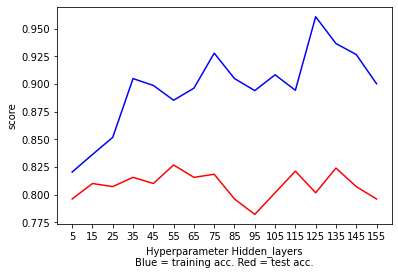

In [129]:
train_result = result_set['split0_train_score']
test_result = result_set['split0_test_score']
print("Total number of models: ", len(test_result))
# plot hidden layers hyperparameter values vs training and test accuracy score
plt.plot(range(0, len(train_result)), train_result, 'b', range(0,len(test_result)), test_result, 'r')
plt.xlabel('Hyperparameter Hidden_layers\nBlue = training acc. Red = test acc.')
plt.xticks(range(0, len(train_result)),range(5, 164, 10))
plt.ylabel('score')
plt.show()

### Feature selection using decision tree

In [130]:
import pickle
with open('DT_CV.pickle', 'rb') as f:
    dt_best,roc_index_dt_cv, fpr_dt_cv, tpr_dt_cv = pickle.load(f)

print(dt_best.best_params_)

{'criterion': 'entropy', 'max_depth': 9, 'min_samples_leaf': 15}


In [131]:
analyse_feature_importance(dt_best.best_estimator_, X.columns)

covid19_symptoms : 0.3198006539590282
income_med : 0.20766814572142106
worried : 0.10744394041468658
risk_mortality : 0.0467617064666149
height : 0.04386997707306075
working_travel critical : 0.04363211613846948
covid19_contact : 0.03336831061010922
race_white : 0.03275753294031491
house_count : 0.031521514545638375
health_worker : 0.023526260130011092
contacts_count : 0.022100660970282834
income_high : 0.017026923100506006
country_BR : 0.014910673871978534
region_AM : 0.01194184107126659
working_stopped : 0.011002081092302708
weight : 0.006225214501125883
age_40_50 : 0.004839249783908826
blood_type_an : 0.003481019415376033
age_70_80 : 0.003348470707766873
age_20_30 : 0.0033280197095969257


In [132]:
from sklearn.feature_selection import SelectFromModel

selectmodel = SelectFromModel(dt_best.best_estimator_, prefit=True)
X_train_sel_model = selectmodel.transform(X_train)
X_test_sel_model = selectmodel.transform(X_test)

print(X_train_sel_model.shape)

(3577, 16)


In [133]:
params = {'hidden_layer_sizes': [(51,), (53,), (55,), (57,), (59,)], 'alpha': [0.01,0.001, 0.0001, 0.00001]}

cv_sel_model = GridSearchCV(param_grid=params, estimator=MLPClassifier(random_state=rs, max_iter = 700), cv=10, n_jobs=-1)
cv_sel_model.fit(X_train_sel_model, y_train)

print("Train accuracy:", cv_sel_model.score(X_train_sel_model, y_train))
print("Test accuracy:", cv_sel_model.score(X_test_sel_model, y_test))

y_pred = cv_sel_model.predict(X_test_sel_model)
print(classification_report(y_test, y_pred))

print(cv_sel_model.best_params_)

Train accuracy: 0.8076600503214985
Test accuracy: 0.7842242503259452
              precision    recall  f1-score   support

           0       0.81      0.86      0.84       973
           1       0.73      0.65      0.69       561

    accuracy                           0.78      1534
   macro avg       0.77      0.76      0.76      1534
weighted avg       0.78      0.78      0.78      1534

{'alpha': 0.01, 'hidden_layer_sizes': (53,)}


In [134]:
cv_sel_model.n_splits_

10

In [135]:
cv_sel_model.n_features_in_

16

In [136]:
result_set_cvsel = cv_sel_model.cv_results_
print(result_set_cvsel)

{'mean_fit_time': array([2.3187396 , 3.48459163, 2.6266854 , 2.53403575, 2.8195493 ,
       2.26456003, 3.34171851, 2.80232379, 2.49592018, 3.13813665,
       2.24098706, 3.16436551, 3.61105275, 2.58462045, 2.72152431,
       2.49883366, 3.05657883, 3.57232368, 2.47018573, 2.86450548]), 'std_fit_time': array([0.41046279, 0.92275382, 0.71242048, 0.81786585, 0.72121264,
       0.63019966, 1.16744584, 0.84683844, 0.85879071, 0.83535547,
       0.52371055, 0.88780772, 1.10898313, 0.66771019, 0.67385025,
       0.50600948, 0.87606525, 0.80655593, 0.71303707, 0.76189884]), 'mean_score_time': array([0.00156262, 0.00156255, 0.        , 0.00070164, 0.        ,
       0.00226407, 0.00191419, 0.        , 0.00186603, 0.00156243,
       0.        , 0.00316639, 0.        , 0.00211377, 0.00312505,
       0.00156243, 0.        , 0.        , 0.        , 0.00095155]), 'std_score_time': array([0.00468786, 0.00468764, 0.        , 0.00210493, 0.        ,
       0.00492041, 0.00574257, 0.        , 0.0046799

### ROC curve

In [137]:
from sklearn.metrics import roc_auc_score

y_pred_proba_nn_1 = model_1.predict_proba(X_test)
y_pred_proba_nn_2 = model_2.predict_proba(X_test)
y_pred_proba_cv_1 = cv_1.predict_proba(X_test)
y_pred_proba_cv_2 = cv_2.predict_proba(X_test)
y_pred_proba_cv_3 = cv_3.predict_proba(X_test)
y_pred_proba_cv_sel_model = cv_sel_model.predict_proba(X_test_sel_model)


roc_index_nn_1 = roc_auc_score(y_test, y_pred_proba_nn_1[:, 1])
roc_index_nn_2 = roc_auc_score(y_test, y_pred_proba_nn_2[:, 1])
roc_index_cv_1 = roc_auc_score(y_test, y_pred_proba_cv_1[:, 1])
roc_index_cv_2 = roc_auc_score(y_test, y_pred_proba_cv_2[:, 1])
roc_index_cv_3 = roc_auc_score(y_test, y_pred_proba_cv_3[:, 1])
roc_index_cv_sel_model = roc_auc_score(y_test, y_pred_proba_cv_sel_model[:, 1])


print("ROC index on test for NN with default MLP:", roc_index_nn_1)
print("ROC index on test for NN with MLP with convergence:", roc_index_nn_2)
print("ROC index on test for NN with default gridsearch:", roc_index_cv_1)
print("ROC index on test for NN with gridsearch with consice parameters:", roc_index_cv_2)
print("ROC index on test for NN with gridsearch with alpha:", roc_index_cv_3)
print("ROC index on test for NN with feature selection (model selection using decision tree) and gridsearch:", roc_index_cv_sel_model)

from sklearn.metrics import roc_curve

fpr_nn_1, tpr_nn_1, thresholds_nn_1 = roc_curve(y_test, y_pred_proba_nn_1[:,1])
fpr_nn_2, tpr_nn_2, thresholds_nn_2 = roc_curve(y_test, y_pred_proba_nn_2[:,1])
fpr_cv_1, tpr_cv_1, thresholds_cv_1 = roc_curve(y_test, y_pred_proba_cv_1[:,1])
fpr_cv_2, tpr_cv_2, thresholds_cv_2 = roc_curve(y_test, y_pred_proba_cv_2[:,1])
fpr_cv_3, tpr_cv_3, thresholds_cv_3 = roc_curve(y_test, y_pred_proba_cv_3[:,1])
fpr_cv_sel_model, tpr_cv_sel_model, thresholds_cv_sel_model = roc_curve(y_test, y_pred_proba_cv_sel_model[:,1])

ROC index on test for NN with default MLP: 0.8481459293985744
ROC index on test for NN with MLP with convergence: 0.8441686681212708
ROC index on test for NN with default gridsearch: 0.8328469386446535
ROC index on test for NN with gridsearch with consice parameters: 0.8563477712864087
ROC index on test for NN with gridsearch with alpha: 0.8563477712864087
ROC index on test for NN with feature selection (model selection using decision tree) and gridsearch: 0.840317814503172


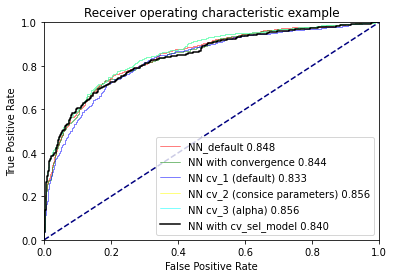

In [138]:
import matplotlib.pyplot as plt

plt.plot(fpr_nn_1, tpr_nn_1, label='NN_default {:.3f}'.format(roc_index_nn_1), color='red', lw=0.5)
plt.plot(fpr_nn_2, tpr_nn_2, label='NN with convergence {:.3f}'.format(roc_index_nn_2), color='green', lw=0.5)
plt.plot(fpr_cv_1, tpr_cv_1, label='NN cv_1 (default) {:.3f}'.format(roc_index_cv_1), color='blue', lw=0.5)
plt.plot(fpr_cv_2, tpr_cv_2, label='NN cv_2 (consice parameters) {:.3f}'.format(roc_index_cv_2), color='yellow', lw=0.5)
plt.plot(fpr_cv_3, tpr_cv_3, label='NN cv_3 (alpha) {:.3f}'.format(roc_index_cv_3), color='cyan', lw=0.5)
plt.plot(fpr_cv_sel_model, tpr_cv_sel_model, label='NN with cv_sel_model {:.3f}'.format(roc_index_cv_sel_model), color='black', lw=1.5)


plt.plot([0, 1], [0, 1], color='navy', lw=1.5, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

## Comparison of models- Decision tree, Linear Regression and NN cv_2

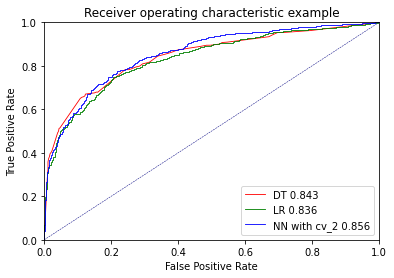

In [139]:
import pickle
with open('DT_CV.pickle', 'rb') as f:
    dt_best,roc_index_dt_cv, fpr_dt_cv, tpr_dt_cv = pickle.load(f)
with open('LR.pickle', 'rb') as f:
    lr_best,roc_index_lr_cv, fpr_lr_cv, tpr_lr_cv = pickle.load(f)   
    

plt.plot(fpr_dt_cv, tpr_dt_cv, label='DT {:.3f}'.format(roc_index_dt_cv), color='red', lw=0.85)
plt.plot(fpr_lr_cv, tpr_lr_cv, label='LR {:.3f}'.format(roc_index_lr_cv), color='green', lw=0.85)
plt.plot(fpr_cv_2, tpr_cv_2, label='NN with cv_2 {:.3f}'.format(roc_index_cv_2), color='blue', lw=0.85)

plt.plot([0, 1], [0, 1], color='navy', lw=0.5, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show() 

#### Accuracy table

| Predictive model    	| train accuracy 	| test accuracy 	|
|---------------------	|----------------	|---------------	|
| Decision tree       	| 83%            	| 80.31%        	|
| Logistic regression 	| 81.91%         	| 78.29%        	|
| Neural Network      	| 85.9%          	| 78.5%         	|